<a href="https://colab.research.google.com/github/victoriousvictor42/Social-Anxiety-classifier-with-R/blob/main/Social_Anxiety_Dataset_classifier_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This is a Social Anxiety Dataset which covers Behavioral, Lifestyle & Psychological Factors which include:-

*   Demographics: Age, Gender, Occupation.
*   Lifestyle: Sleep hours, Physical activity, Diet quality, Alcohol use, Caffeine intake, Smoking habits.


*   Health & Mental Indicators: Heart rate, Breathing rate, Stress level, Sweating level, Dizziness.
*   Mental Health History: Family history of anxiety, Use of medication, Therapy frequency.


*   Life Events: Recent major life events.



The goal of this project is to build a model that can predict social anxiety levels. The models that we will use are:-


*   Logistic regression and
*   Simple Extreme Gradient Boost (XGBoost)




## 1. Load Libraries

In [1]:
# Installing packages
install.packages("gridExtra")
install.packages("psych")
install.packages("ggcorrplot")
install.packages("GGally")
install.packages("magrittr")
install.packages("janitor")
install.packages("skimr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(GGally)
library(magrittr)
library(janitor)
library(skimr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.

## 2. Loading the data

In [5]:
df <- read.csv('/content/enhanced_anxiety_dataset.csv') %>% janitor::clean_names()

In [6]:
## cheking for the preview of the first 6 rows of the dataset
head(df)

,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,anxiety_level_1_10
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>
1,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5
2,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3
3,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1
4,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2
5,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1
6,53,Male,Other,6.4,6.5,235,2,No,No,9,84,14,3,No,Yes,2,Yes,5,4


In [7]:
## Checking for a preview of the last 6 rows of the dataset
tail(df)

,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,anxiety_level_1_10
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>
10995,51,Female,Freelancer,6.3,4.3,144,14,No,Yes,4,93,29,4,Yes,Yes,8,No,4,4
10996,23,Female,Engineer,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6
10997,50,Other,Teacher,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3
10998,29,Male,Nurse,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4
10999,53,Other,Artist,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4
11000,56,Other,Teacher,6.1,1.1,205,11,No,No,1,66,13,3,No,No,2,Yes,8,2


In [8]:
glimpse(df)

Rows: 11,000
Columns: 19
$ age                             <int> 29, 46, 64, 20, 49, 53, 20, 54, 51, 59…
$ gender                          <chr> "Female", "Other", "Male", "Female", "…
$ occupation                      <chr> "Artist", "Nurse", "Other", "Scientist…
$ sleep_hours                     <dbl> 6.0, 6.2, 5.0, 5.8, 8.2, 6.4, 7.9, 6.3…
$ physical_activity_hrs_week      <dbl> 2.7, 5.7, 3.7, 2.8, 2.3, 6.5, 2.5, 5.5…
$ caffeine_intake_mg_day          <int> 181, 200, 117, 360, 247, 235, 78, 535,…
$ alcohol_consumption_drinks_week <int> 10, 8, 4, 6, 4, 2, 14, 15, 2, 15, 4, 1…
$ smoking                         <chr> "Yes", "Yes", "No", "Yes", "Yes", "No"…
$ family_history_of_anxiety       <chr> "No", "Yes", "Yes", "No", "No", "No", …
$ stress_level_1_10               <int> 10, 1, 1, 4, 1, 9, 8, 5, 2, 5, 3, 2, 1…
$ heart_rate_bpm                  <int> 114, 62, 91, 86, 98, 84, 118, 113, 81,…
$ breathing_rate_breaths_min      <int> 14, 23, 28, 17, 19, 14, 21, 19, 22, 28…
$ sweating_leve

the dataset has 11,000 rows and 19 columns consisting of 12 interger columns and 7 character(string) columns

## 3. Exploratory Data Analysis (EDA)

In [9]:
summary(df)

      age           gender           occupation         sleep_hours    
 Min.   :18.00   Length:11000       Length:11000       Min.   : 2.300  
 1st Qu.:29.00   Class :character   Class :character   1st Qu.: 5.900  
 Median :40.00   Mode  :character   Mode  :character   Median : 6.700  
 Mean   :40.24                                         Mean   : 6.651  
 3rd Qu.:51.00                                         3rd Qu.: 7.500  
 Max.   :64.00                                         Max.   :11.300  
 physical_activity_hrs_week caffeine_intake_mg_day
 Min.   : 0.000             Min.   :  0.0         
 1st Qu.: 1.500             1st Qu.:172.0         
 Median : 2.800             Median :273.0         
 Mean   : 2.942             Mean   :286.1         
 3rd Qu.: 4.200             3rd Qu.:382.0         
 Max.   :10.100             Max.   :599.0         
 alcohol_consumption_drinks_week   smoking          family_history_of_anxiety
 Min.   : 0.000                  Length:11000       Length:11

In [10]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,11000,40.241727,13.2361401,40.0,40.073523,16.30860,18.0,64.0,46.0,0.097309668,-1.12671477,0.126201644
gender*,2,11000,1.989364,0.8170025,2.0,1.986705,1.48260,1.0,3.0,2.0,0.019550980,-1.50173798,0.007789813
occupation*,3,11000,6.981273,3.7442582,7.0,6.985795,4.44780,1.0,13.0,12.0,-0.005667793,-1.21629735,0.035700101
sleep_hours,4,11000,6.650691,1.2275090,6.7,6.683102,1.18608,2.3,11.3,9.0,-0.224410982,-0.04862837,0.011703839
physical_activity_hrs_week,5,11000,2.942136,1.8278254,2.8,2.835000,1.92738,0.0,10.1,10.1,0.506871695,-0.21603141,0.017427631
caffeine_intake_mg_day,6,11000,286.090000,144.8131567,273.0,279.965682,155.67300,0.0,599.0,599.0,0.323852976,-0.70209057,1.380739273
alcohol_consumption_drinks_week,7,11000,9.701636,5.6897128,10.0,9.731250,7.41300,0.0,19.0,19.0,-0.023327381,-1.15953330,0.054249283
smoking*,8,11000,1.525364,0.4993790,2.0,1.531705,0.00000,1.0,2.0,1.0,-0.101571480,-1.98986411,0.004761392
family_history_of_anxiety*,9,11000,1.531545,0.4990266,2.0,1.539432,0.00000,1.0,2.0,1.0,-0.126416461,-1.98419924,0.004758032


In [11]:
skim_df <- skimr::skim(df)
print(skim_df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             11000 
Number of columns          19    
_______________________          
Column type frequency:           
  character                7     
  numeric                  12    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable             n_missing complete_rate min max empty n_unique
1 gender                            0             1   4   6     0        3
2 occupation                        0             1   4  10     0       13
3 smoking                           0             1   2   3     0        2
4 family_history_of_anxiety         0             1   2   3     0        2
5 dizziness                         0             1   2   3     0        2
6 medication                        0             1   2   3     0        2
7 recent_maj

## 4. Data Cleaning
### 4.1 checking missing values

In [12]:
na <- data.frame(Na_count = colSums(is.na(df)))
na

,Na_count
,<dbl>
age,0
gender,0
occupation,0
sleep_hours,0
physical_activity_hrs_week,0
caffeine_intake_mg_day,0
alcohol_consumption_drinks_week,0
smoking,0
family_history_of_anxiety,0


There are no missing values in the dataset

### 4.2 Duplicate Value

In [13]:
sum(duplicated(df))

[1] 0

There are no duplicated rows in the dataset

## 5. Data Transformation

In [14]:
# Creating a Target
df <- df %>% mutate(
  anxiety_level = ifelse(anxiety_level_1_10 >= 5, 'High','Low')
)

In [15]:
# Data Type Conversion (Character -> Factor)
df <- df %>% mutate(across(
  c(
    where(is.character)
  ),
  ~as.factor(.x)
))

In [16]:
# checking the implimentation of the data type conversion
str(df)

'data.frame':	11000 obs. of  20 variables:
 $ age                            : int  29 46 64 20 49 53 20 54 51 59 ...
 $ gender                         : Factor w/ 3 levels "Female","Male",..: 1 3 2 1 1 2 2 1 3 1 ...
 $ occupation                     : Factor w/ 13 levels "Artist","Athlete",..: 1 9 10 11 10 10 1 7 7 13 ...
 $ sleep_hours                    : num  6 6.2 5 5.8 8.2 6.4 7.9 6.3 6.6 5.1 ...
 $ physical_activity_hrs_week     : num  2.7 5.7 3.7 2.8 2.3 6.5 2.5 5.5 3.1 4.8 ...
 $ caffeine_intake_mg_day         : int  181 200 117 360 247 235 78 535 587 159 ...
 $ alcohol_consumption_drinks_week: int  10 8 4 6 4 2 14 15 2 15 ...
 $ smoking                        : Factor w/ 2 levels "No","Yes": 2 2 1 2 2 1 2 1 1 2 ...
 $ family_history_of_anxiety      : Factor w/ 2 levels "No","Yes": 1 2 2 1 1 1 1 1 1 1 ...
 $ stress_level_1_10              : int  10 1 1 4 1 9 8 5 2 5 ...
 $ heart_rate_bpm                 : int  114 62 91 86 98 84 118 113 81 95 ...
 $ breathing_rate_breaths_min 

## 6. Data Visualization

### 6.1 Fetching the columns with numbers and factors






In [17]:
num_cols <- df %>% select(where(is.numeric)) %>% colnames()
cat_cols <- df %>% select(where(is.factor)) %>% colnames()

In [18]:
cat('num_cols :', num_cols,'\n')
cat('length :', length(num_cols),'\n')
cat('--------------------------------', '\n')
cat('cat_cols :', cat_cols, '\n')
cat('length :', length(cat_cols), '\n')

num_cols : age sleep_hours physical_activity_hrs_week caffeine_intake_mg_day alcohol_consumption_drinks_week stress_level_1_10 heart_rate_bpm breathing_rate_breaths_min sweating_level_1_5 therapy_sessions_per_month diet_quality_1_10 anxiety_level_1_10 
length : 12 
-------------------------------- 
cat_cols : gender occupation smoking family_history_of_anxiety dizziness medication recent_major_life_event anxiety_level 
length : 8 


### 6.2 Histogram, Boxplot and Densityplot

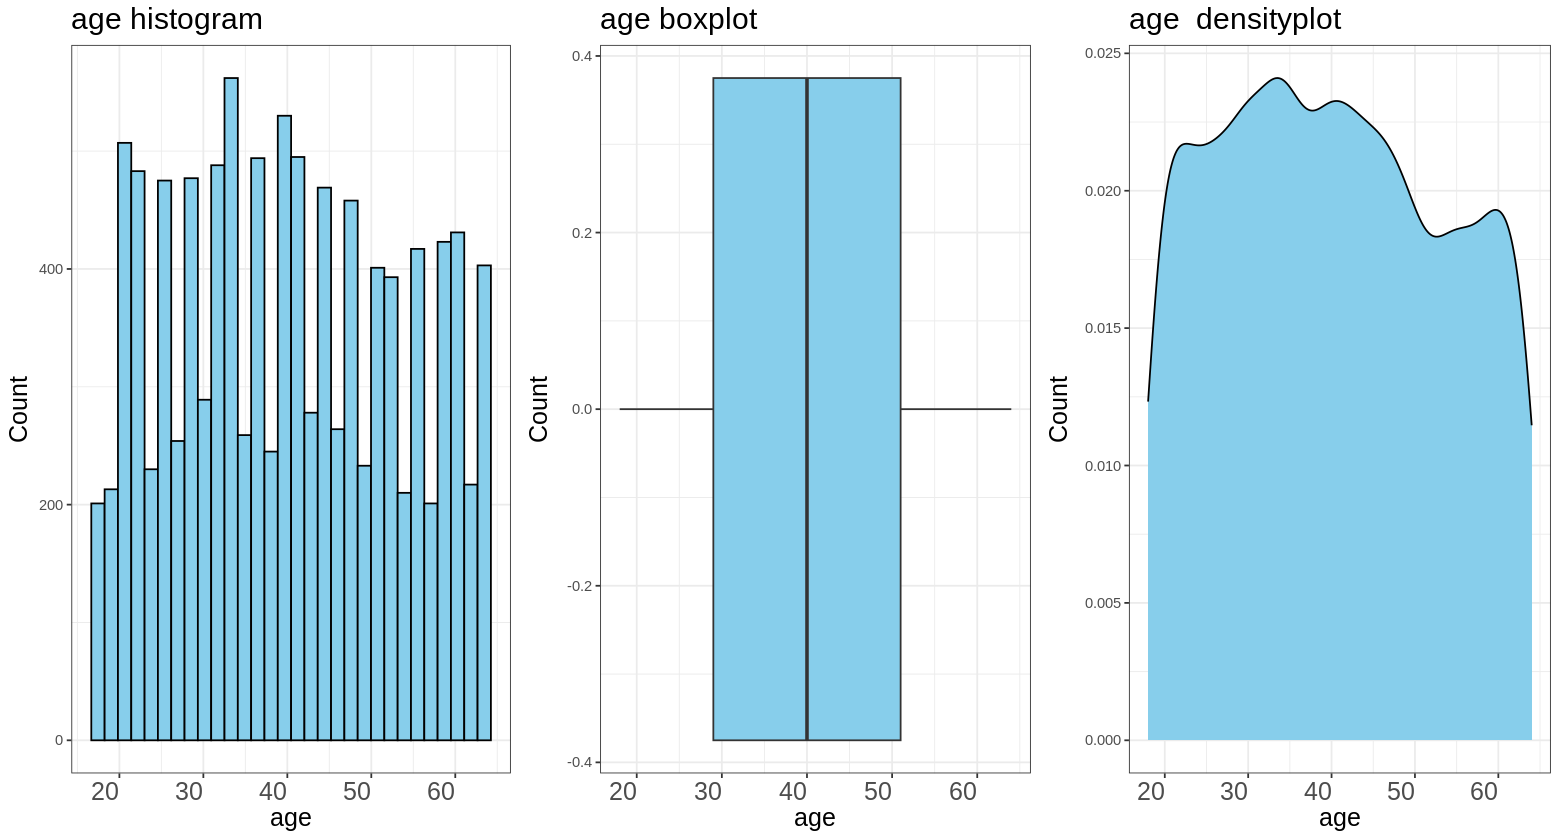

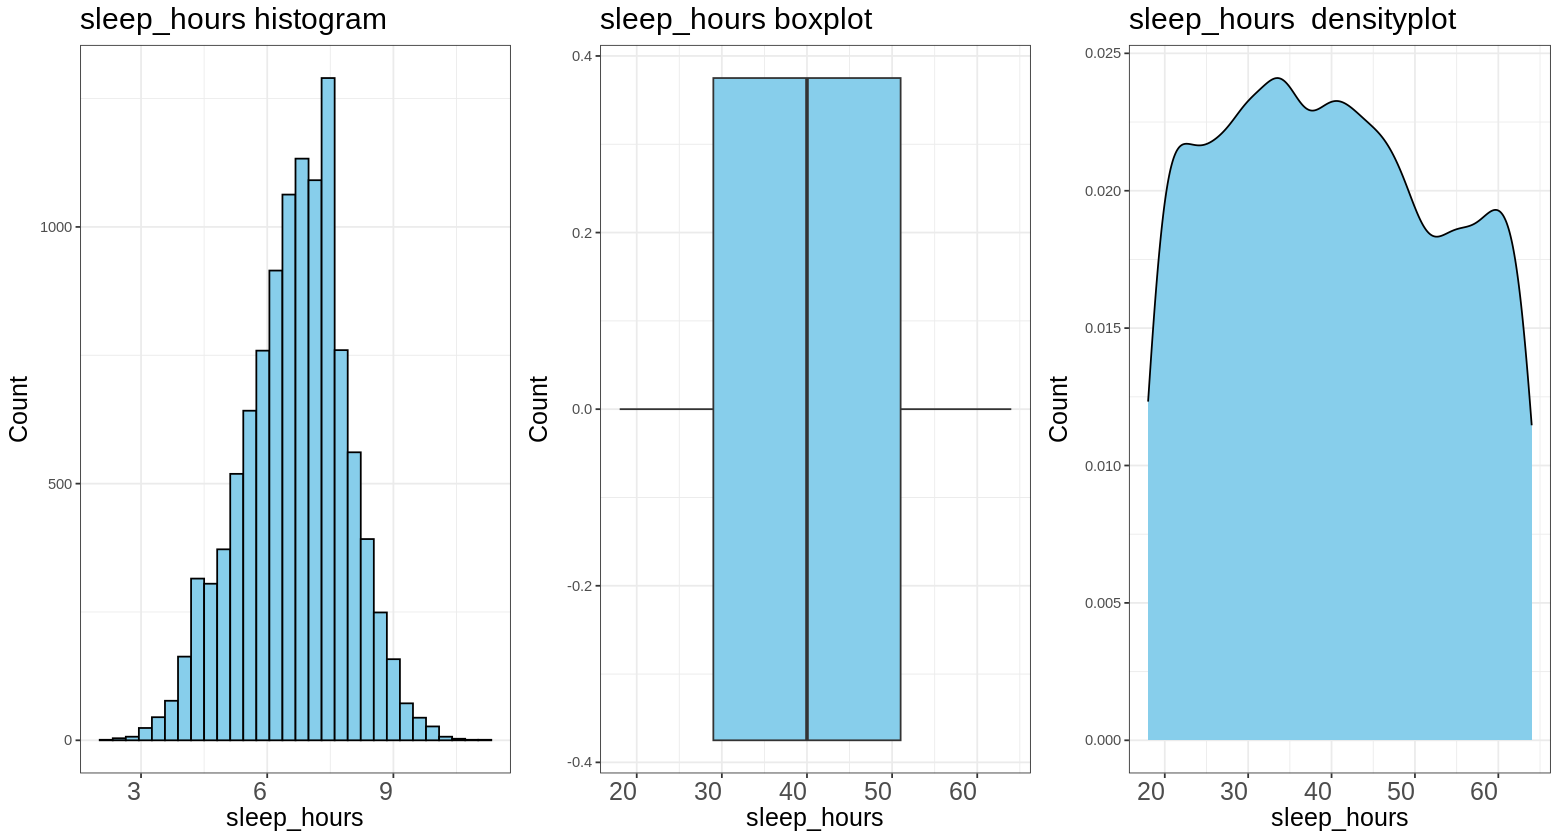

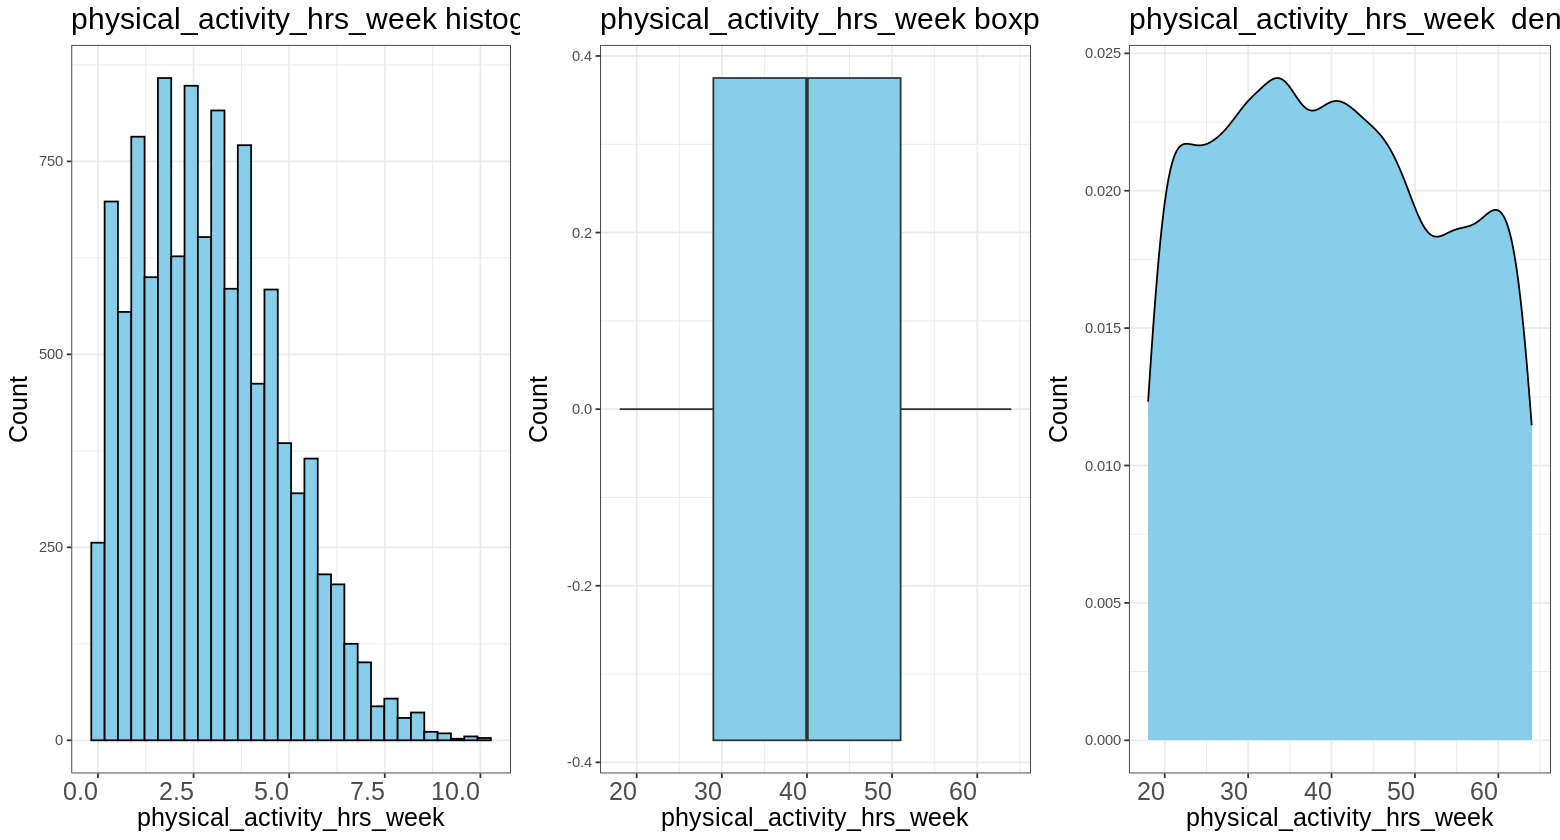

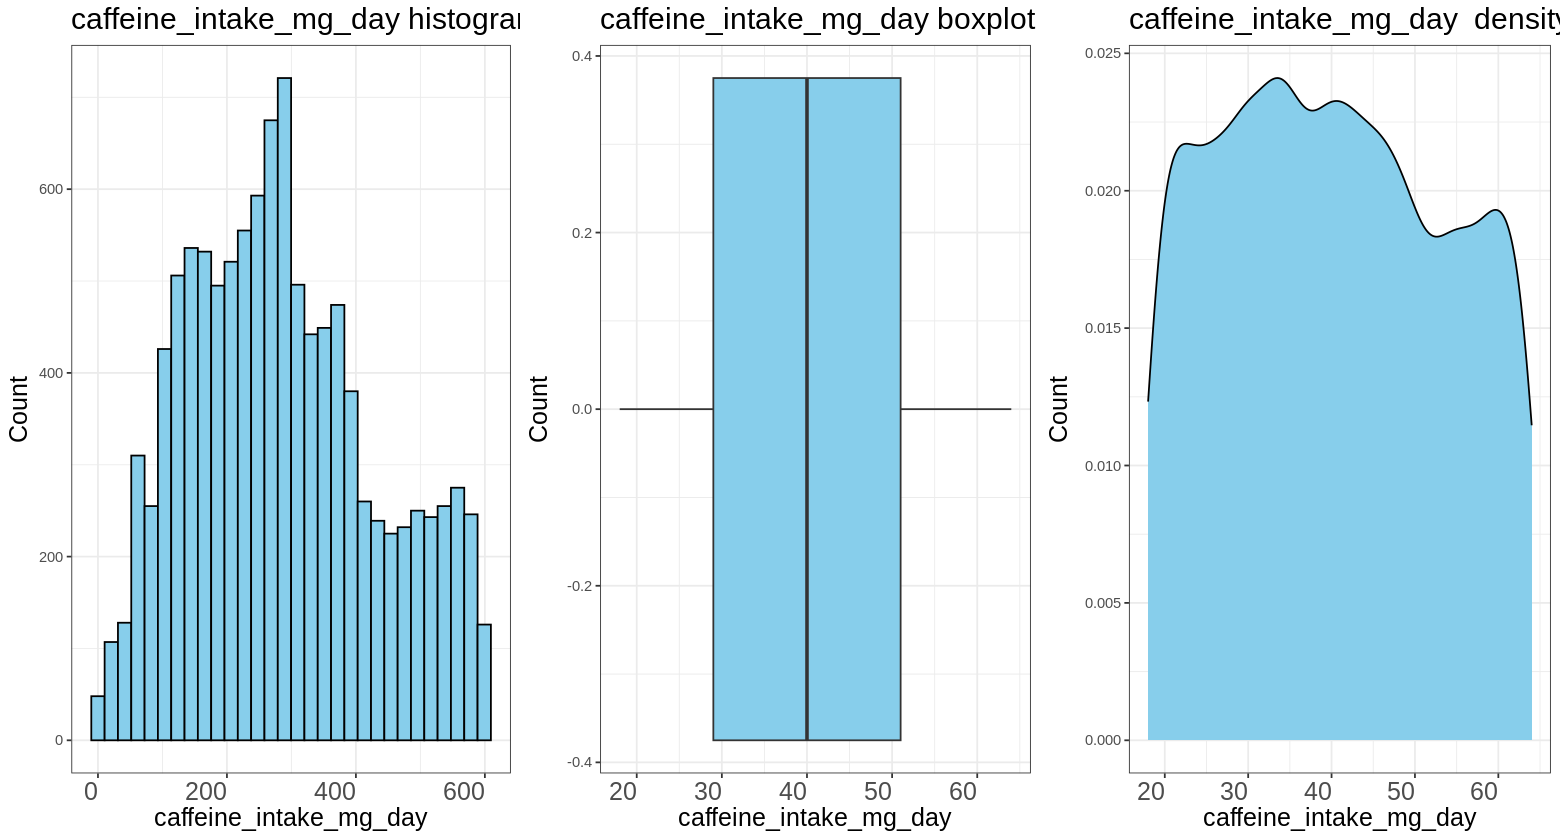

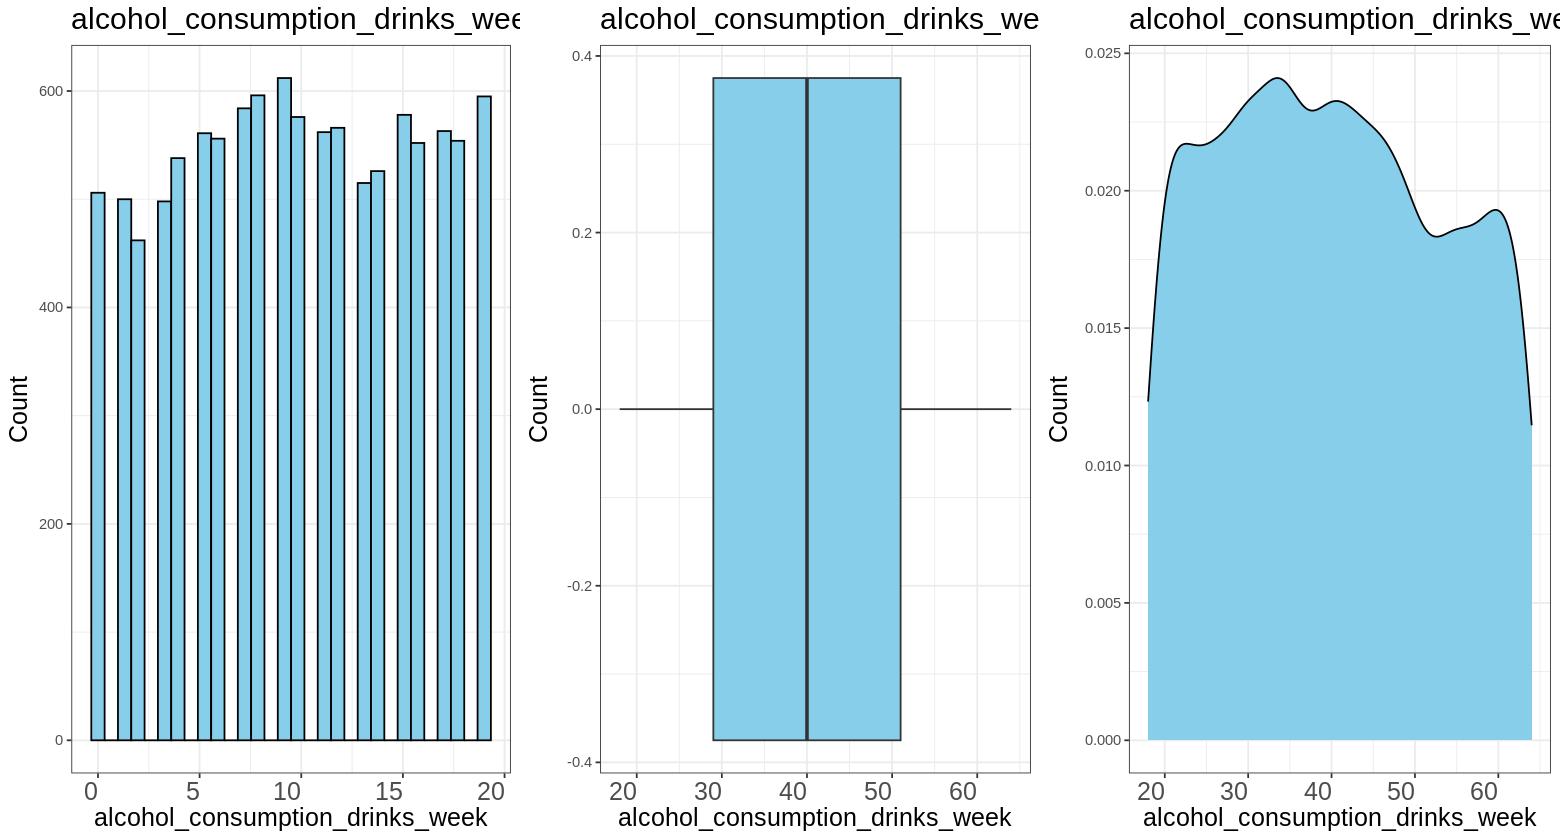

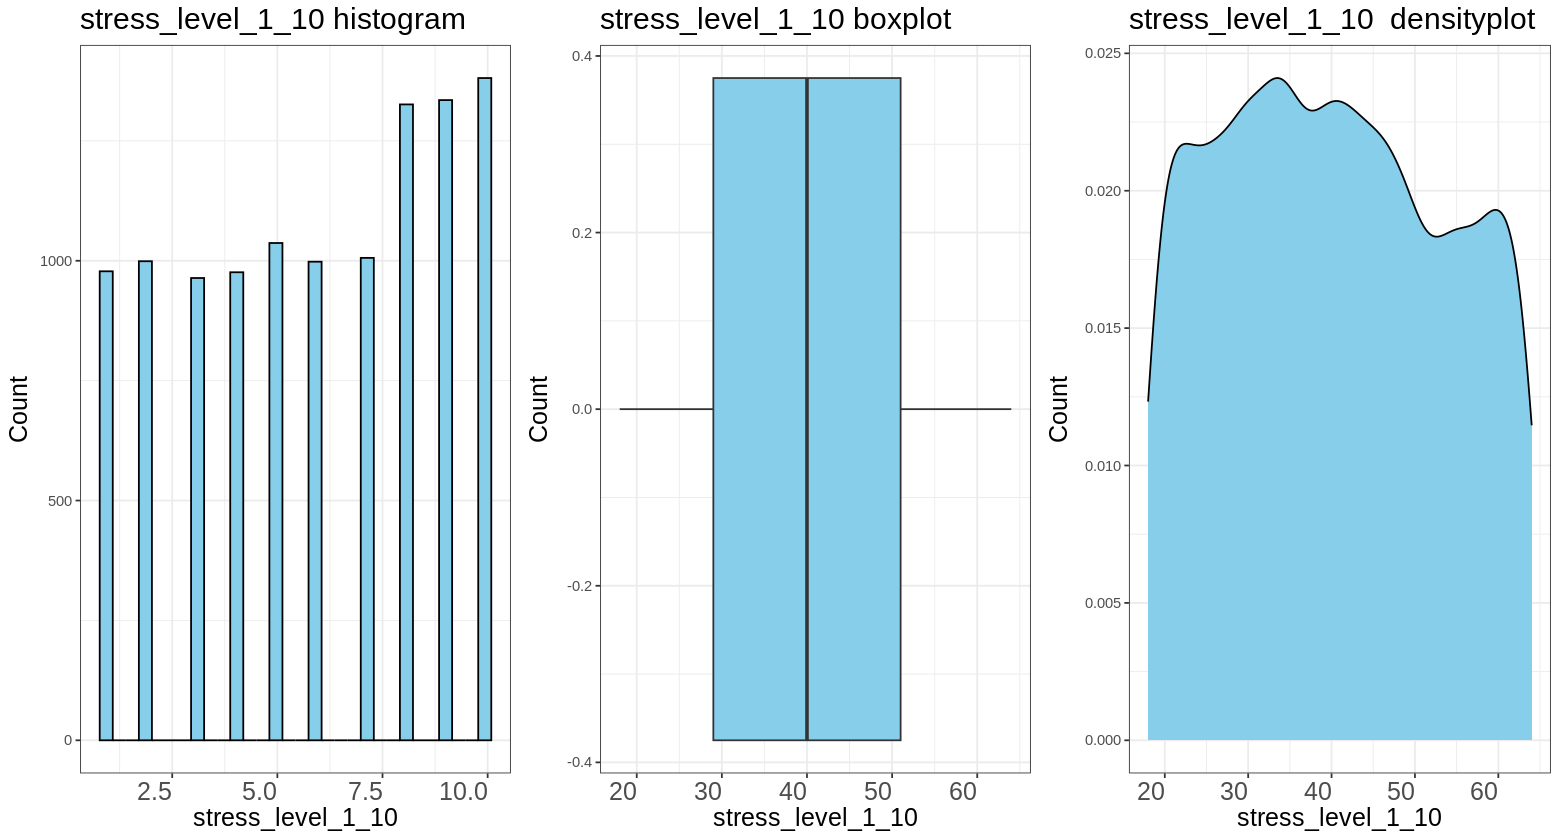

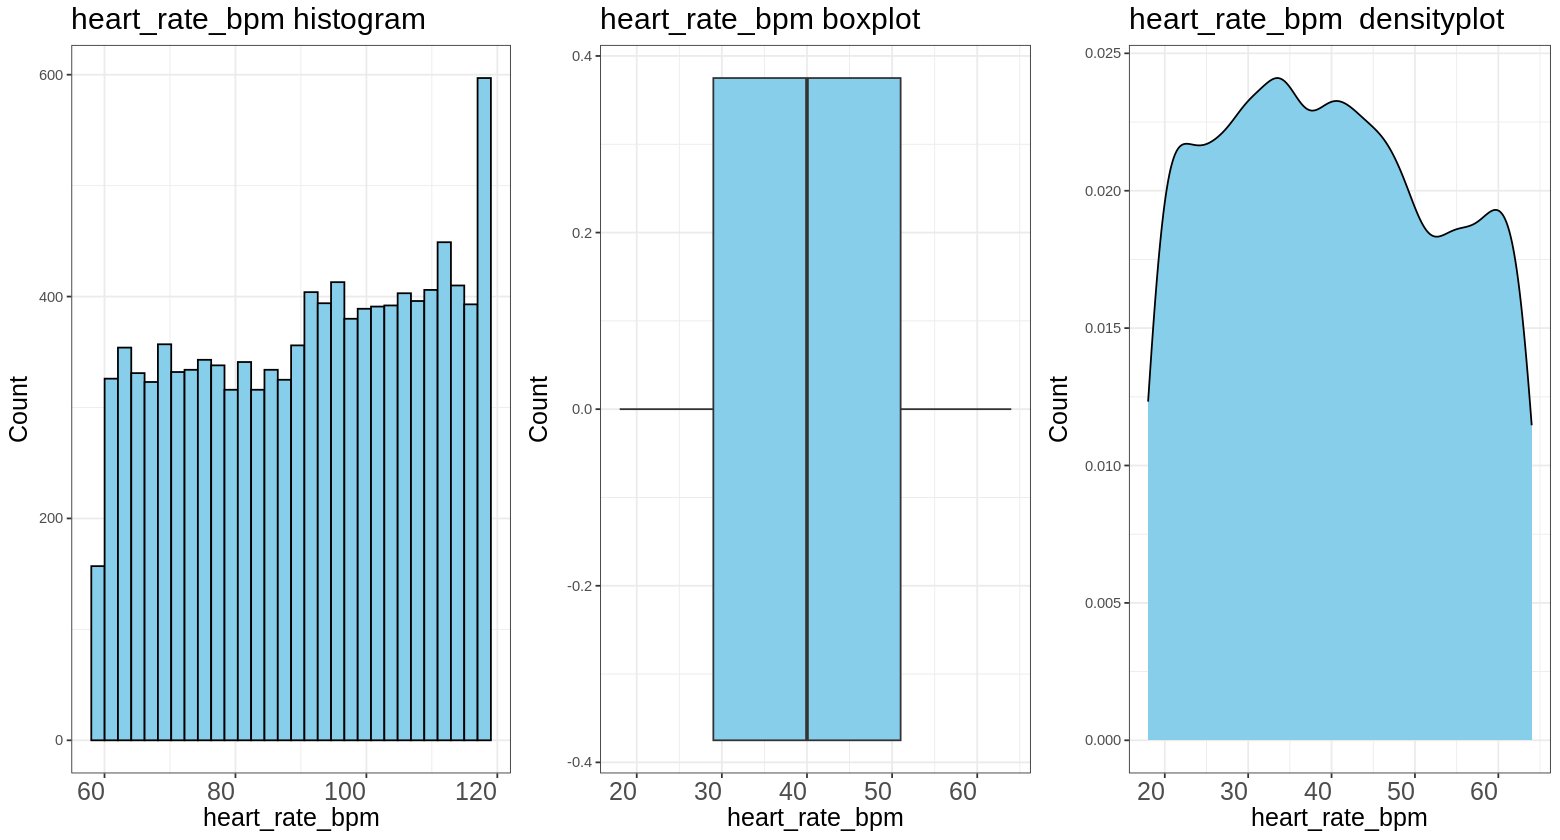

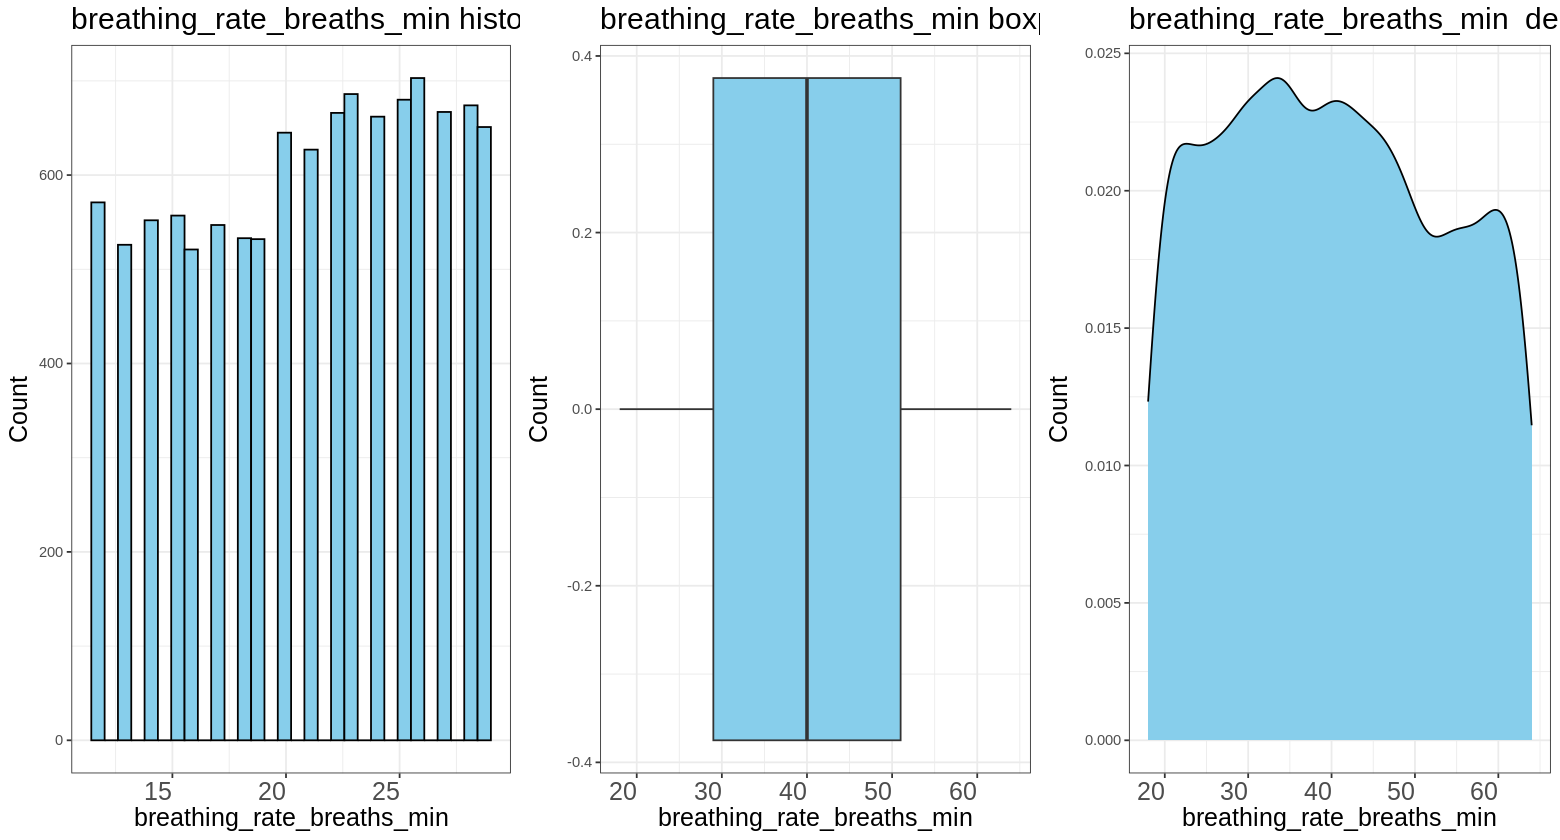

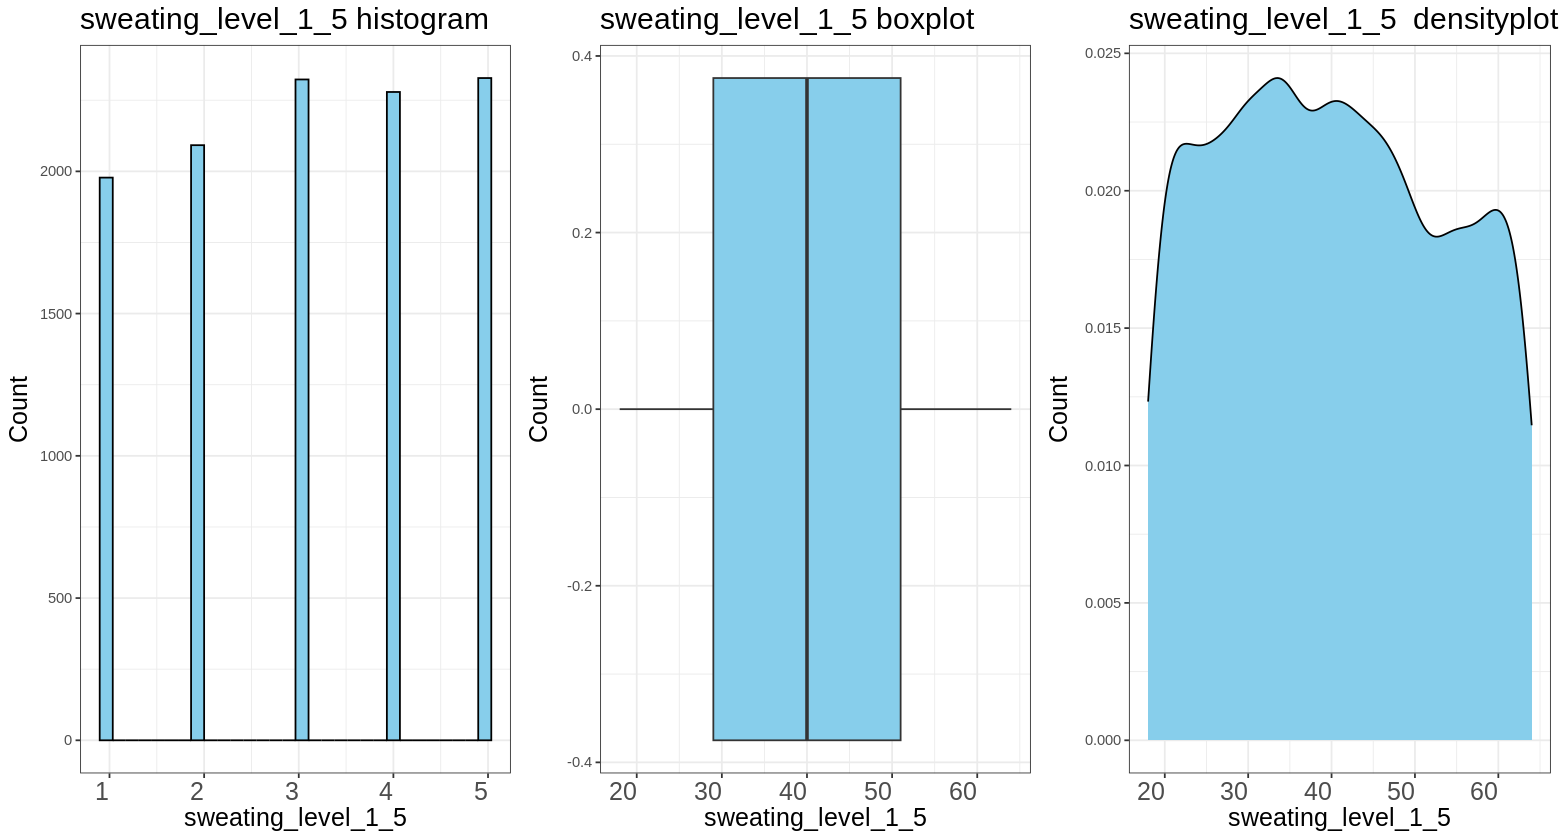

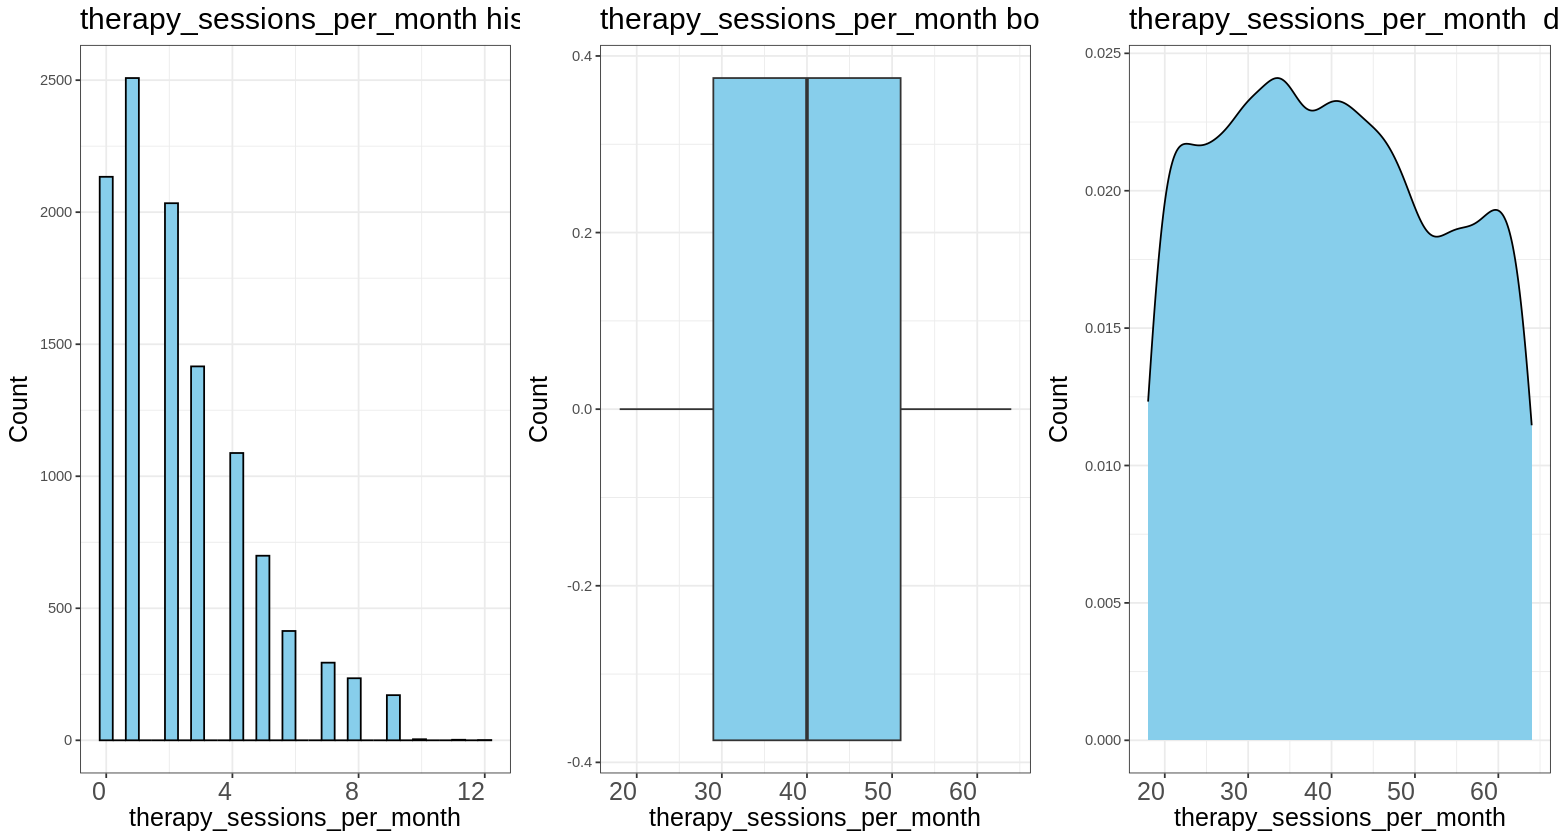

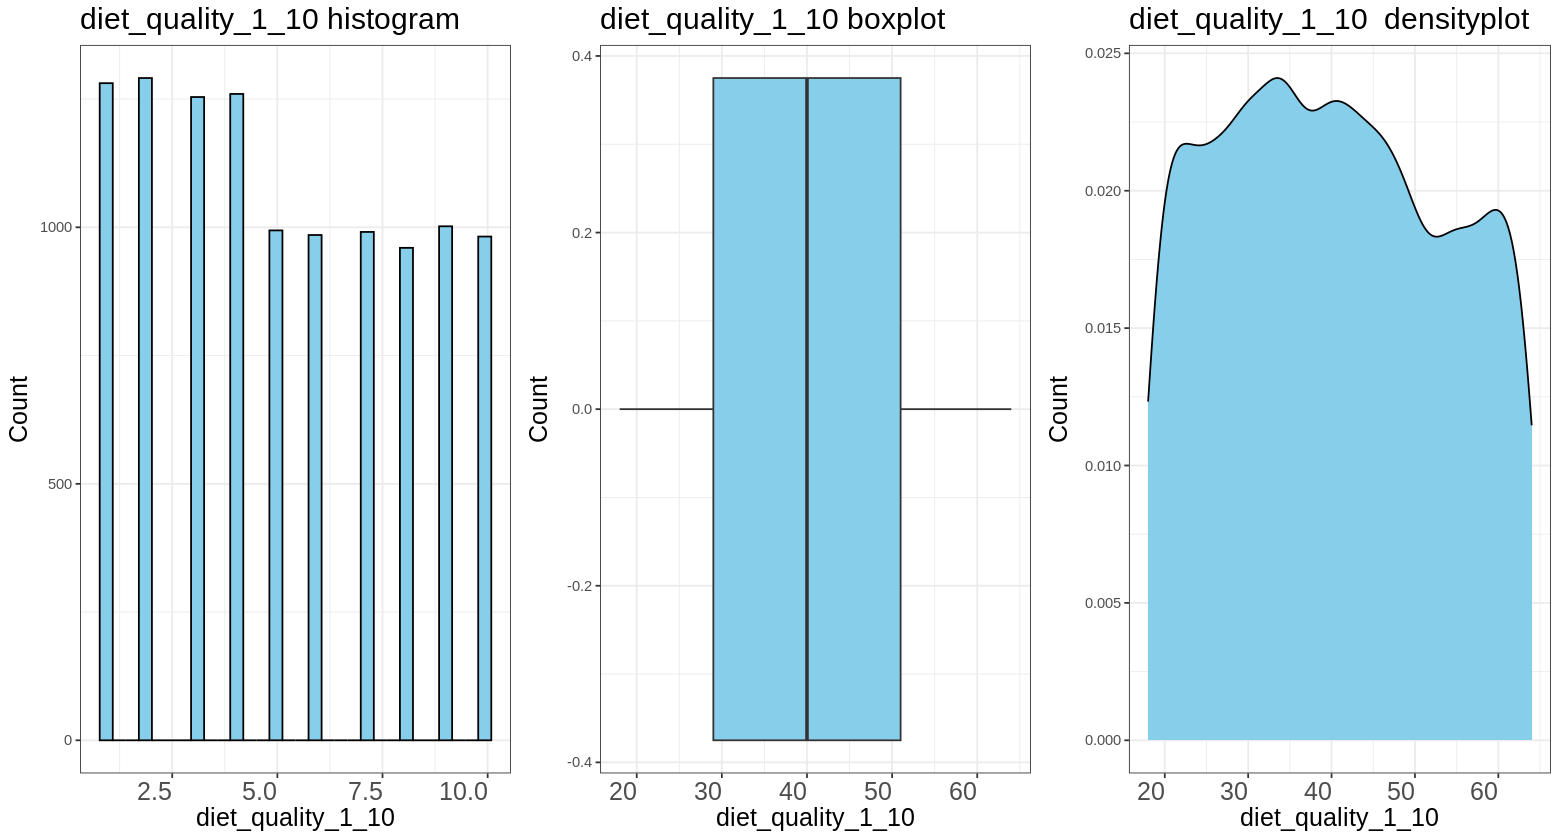

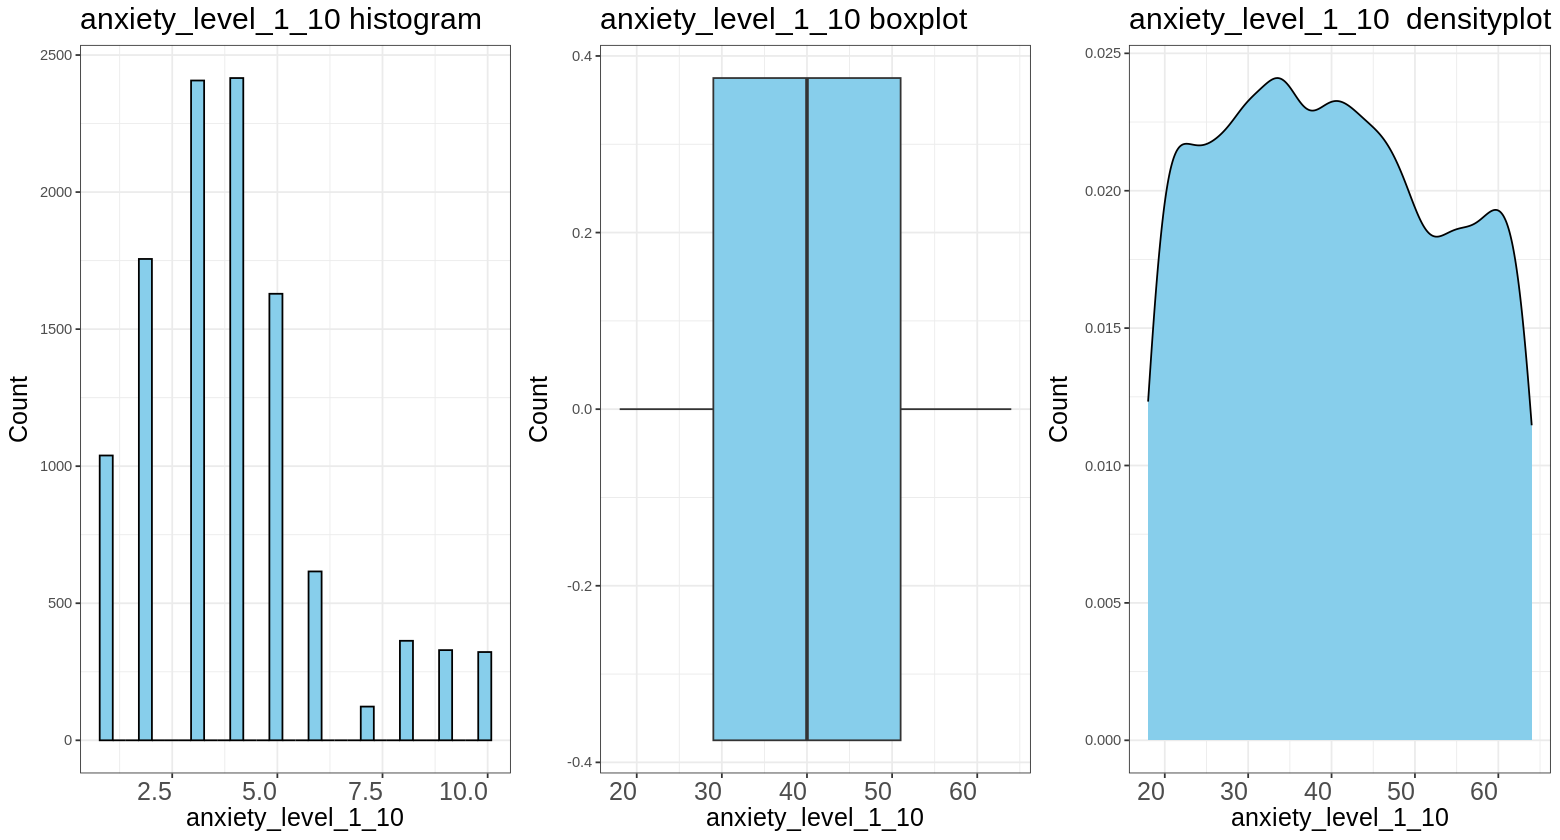

In [19]:
# Checking the distribution of the data
options(repr.plot.width = 13.0, repr.plot.height =7.0)

for(i in num_cols){
  a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', bins=30) +
    labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count')+
    theme_bw()+
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15,hjust=1),
    title= element_text(size=15))

  b <- ggplot(df) + geom_boxplot(aes(x = df[,1]), fill= 'skyblue') +
    labs(title = paste0(names(df[i]),' boxplot'), x= names(df[i]), y='Count') +
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size=15, hjust=1),
    title = element_text(size=15))

  c <- ggplot(df) + geom_density(aes(x=df[,1]), fill= 'skyblue') +
    labs(title = paste(names(df[i]), ' densityplot'), x = names(df[i]), y = 'Count') +
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size=15, hjust=1),
    title = element_text(size=15))

  grid.arrange(a,b,c, ncol = 3)



}

### 6.3 Countplot

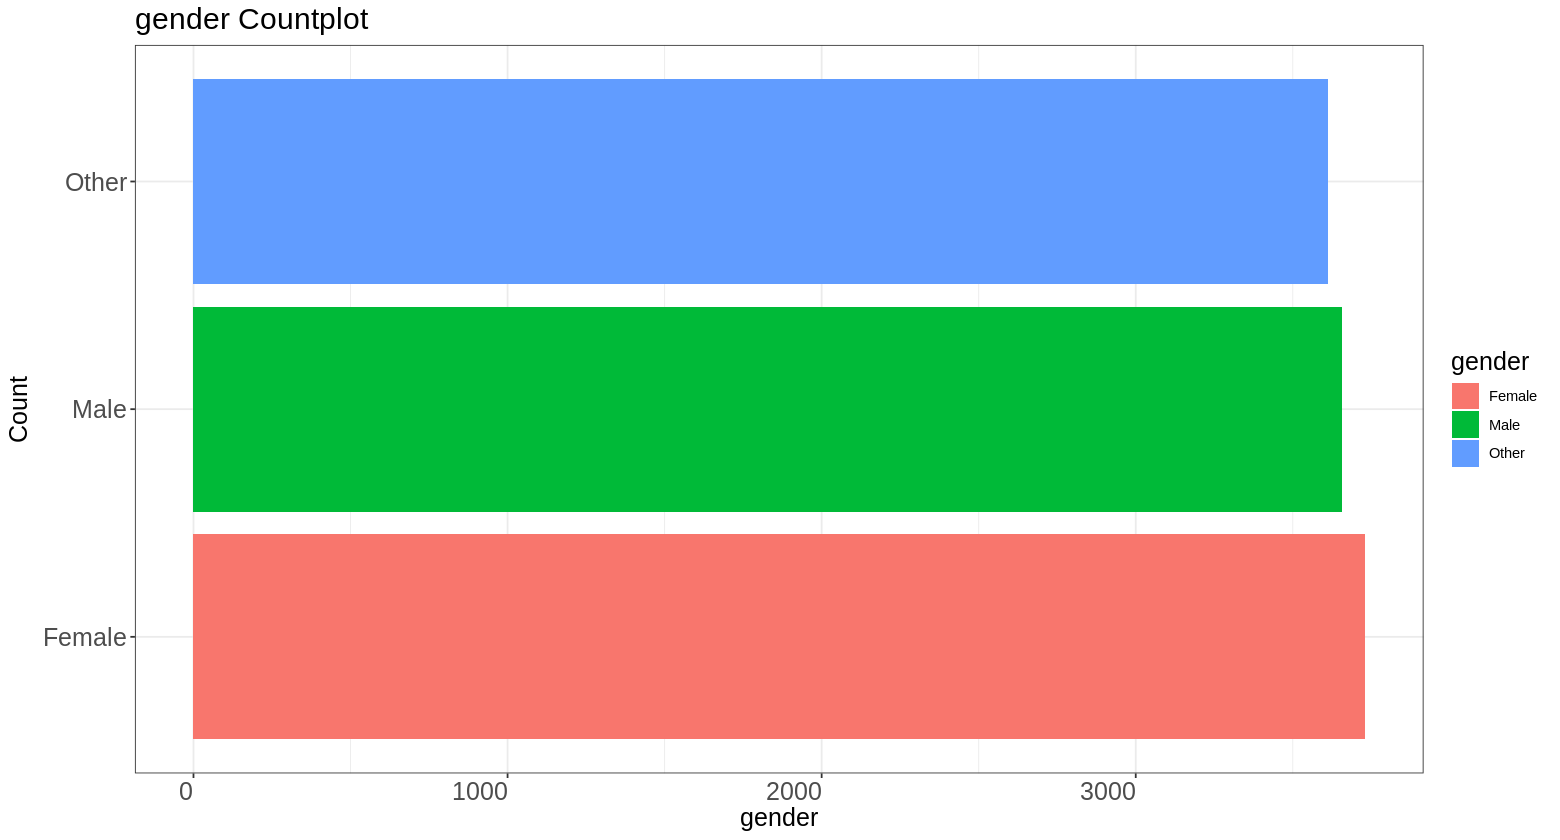

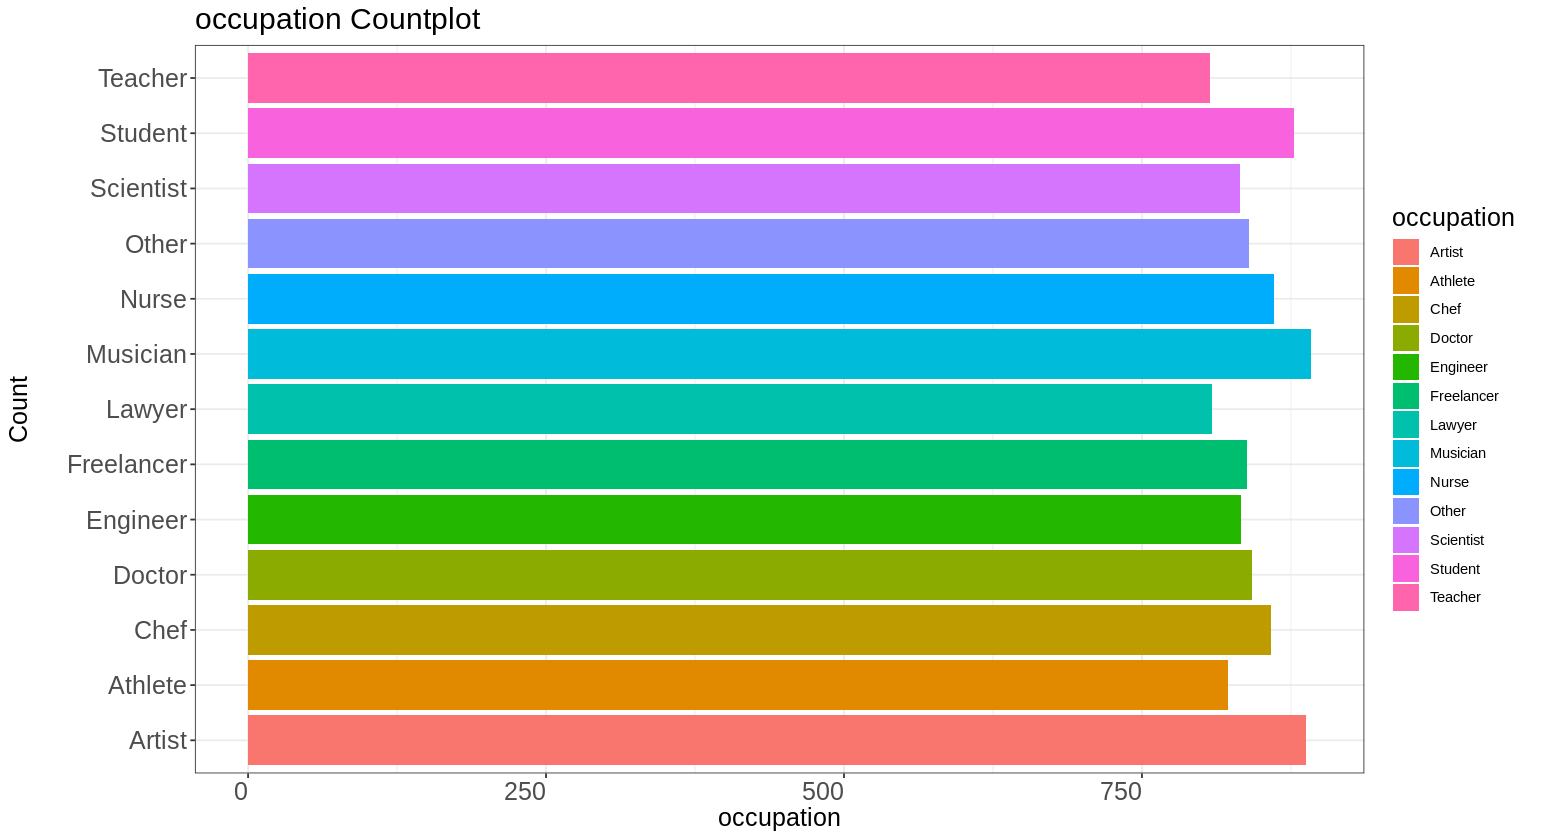

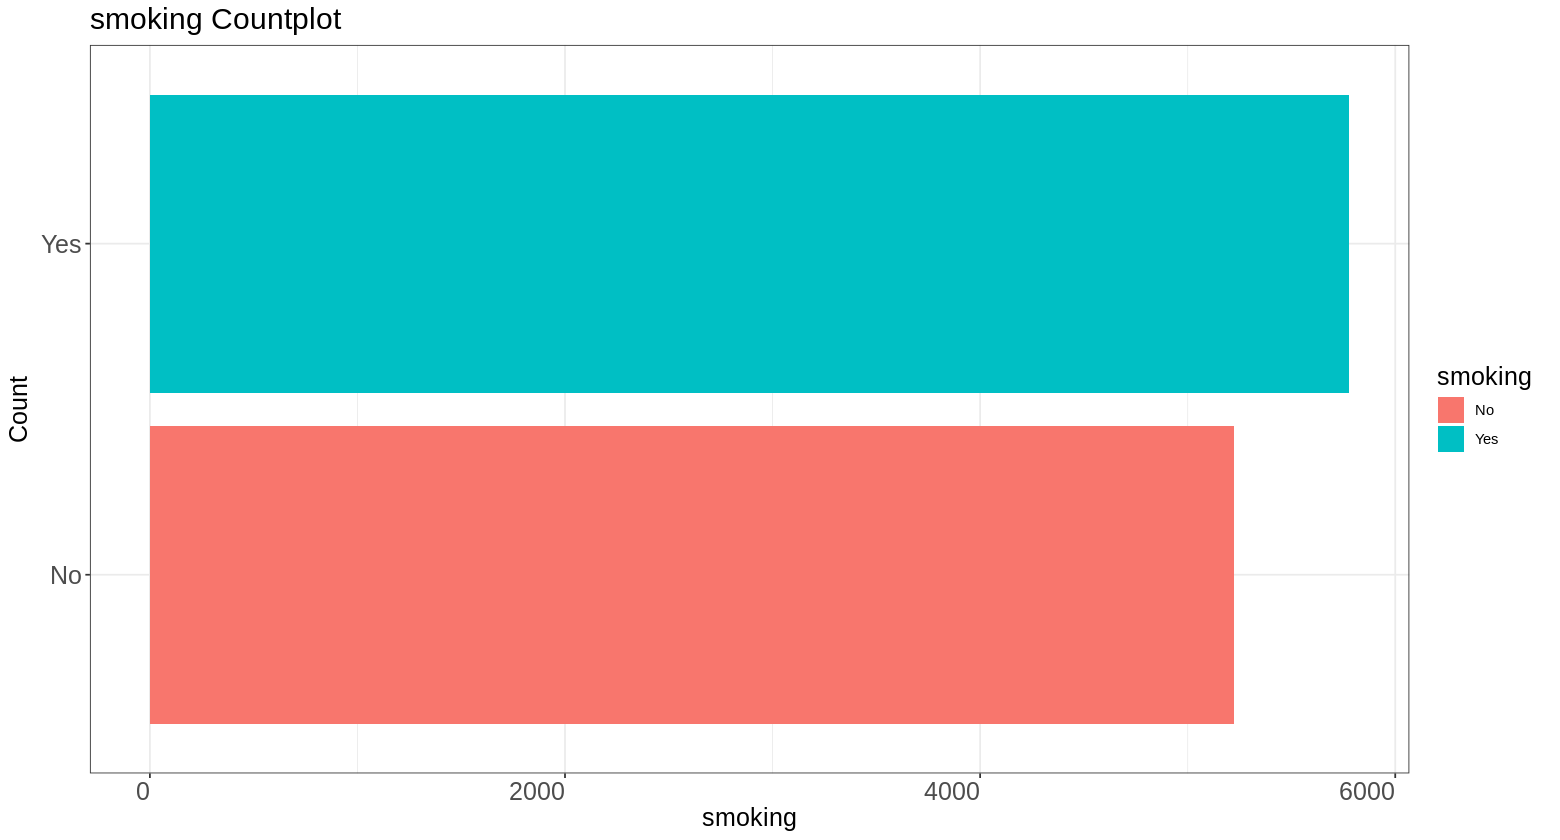

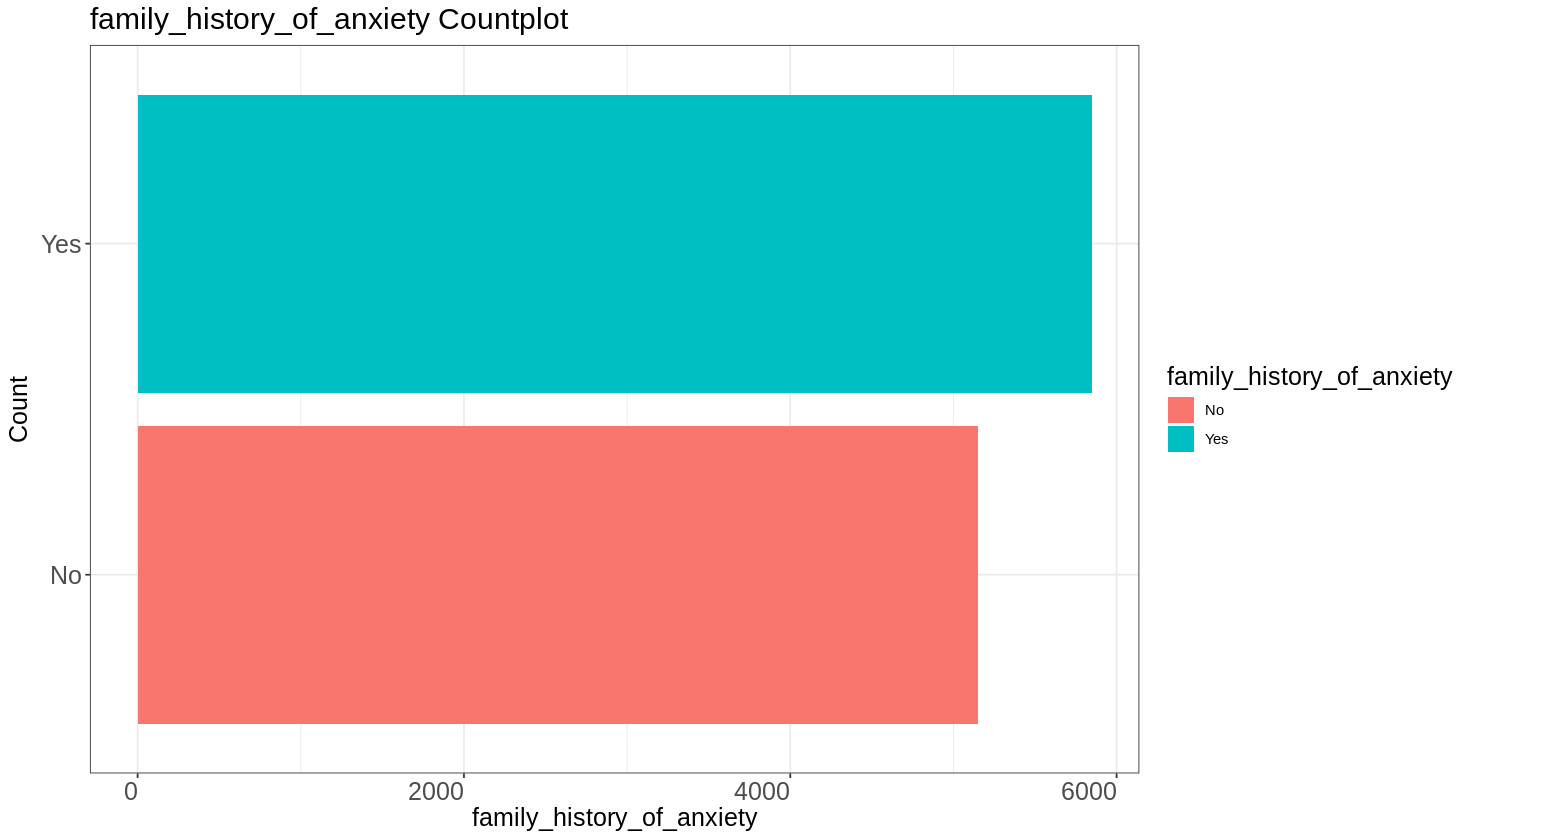

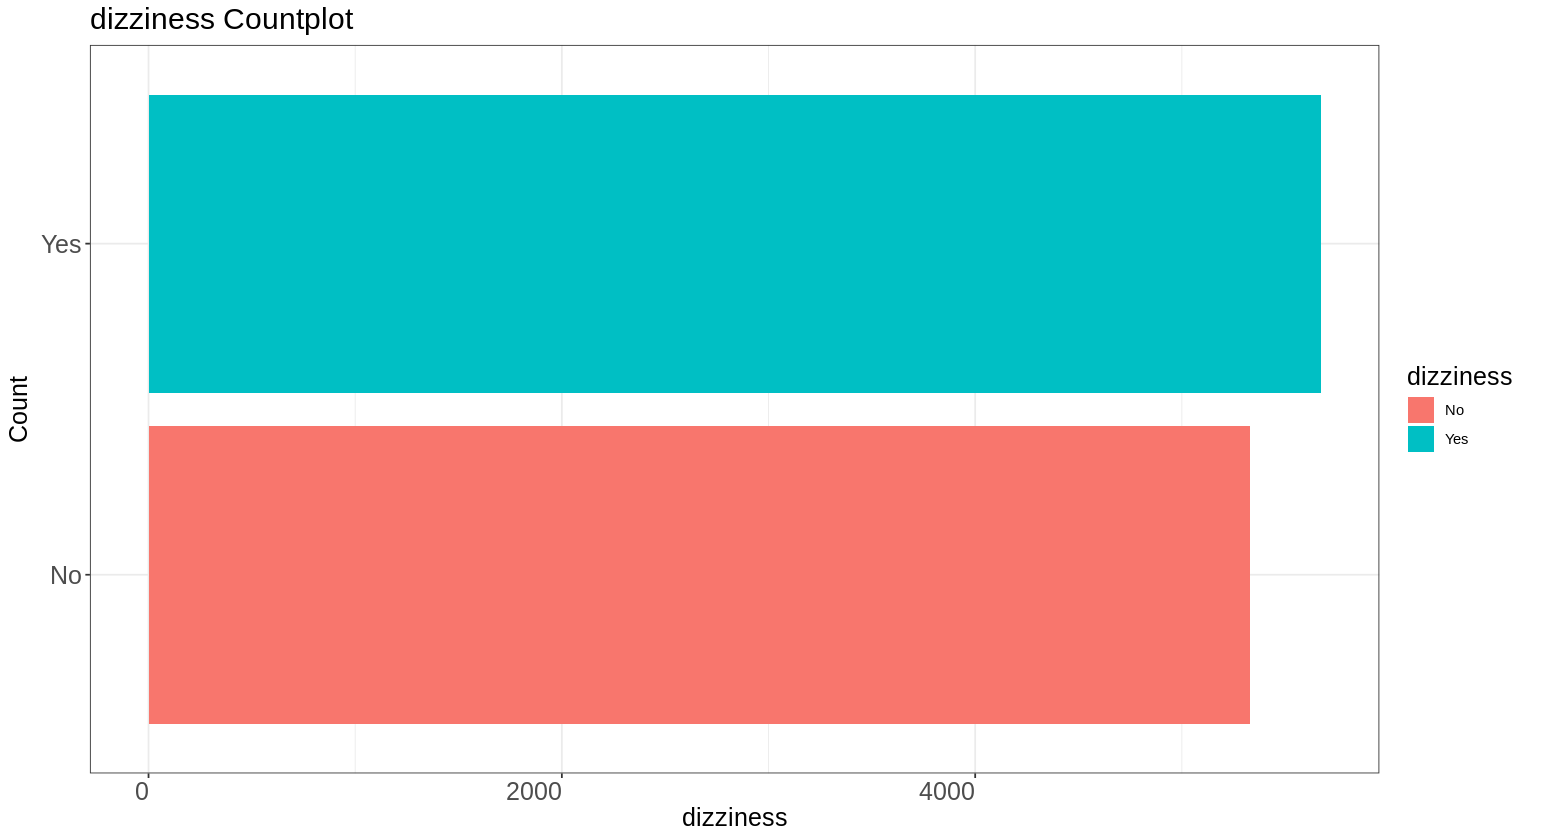

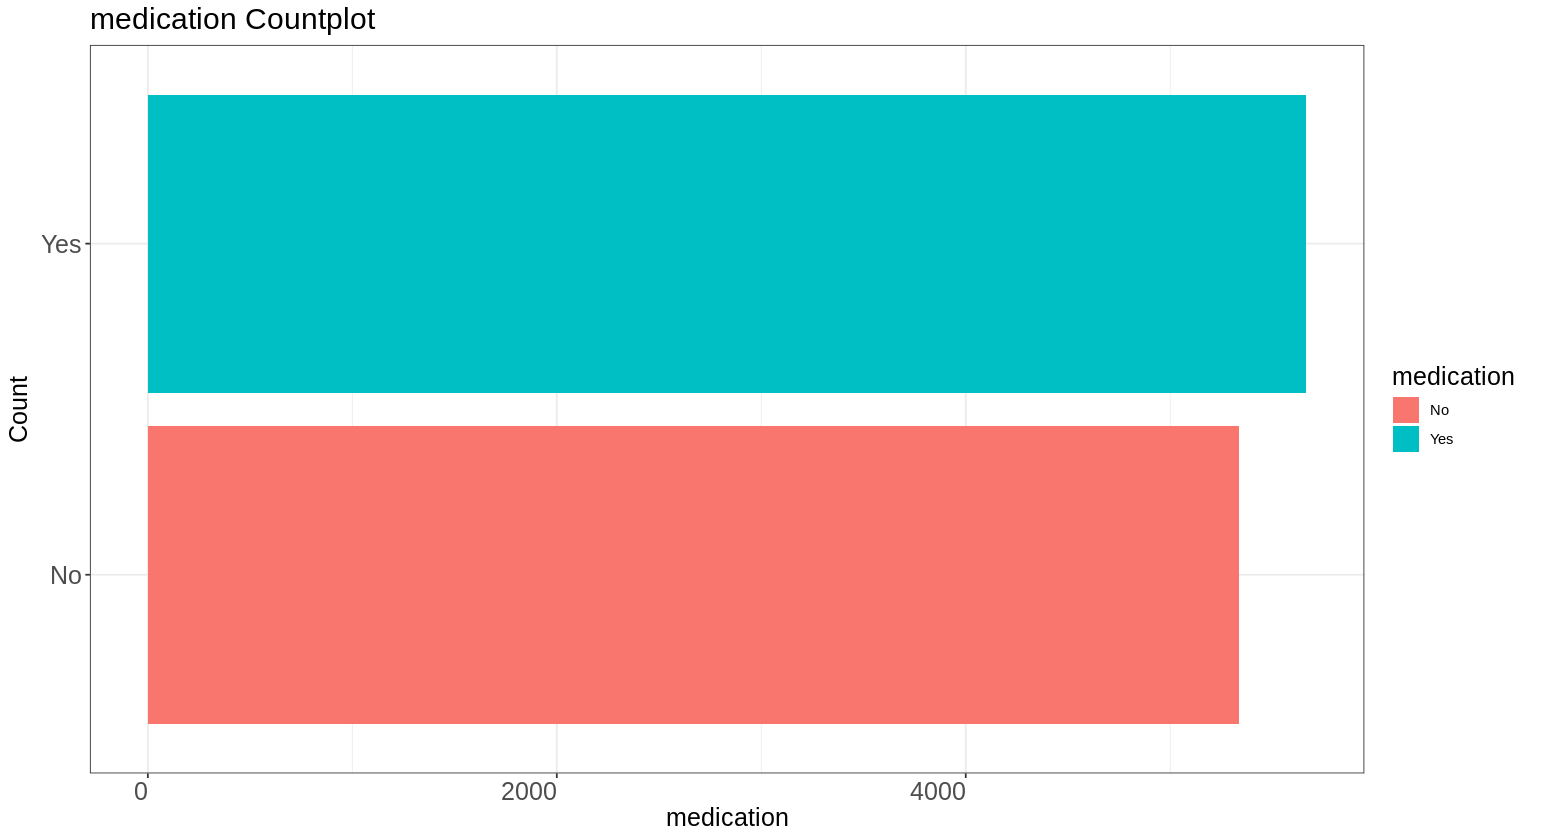

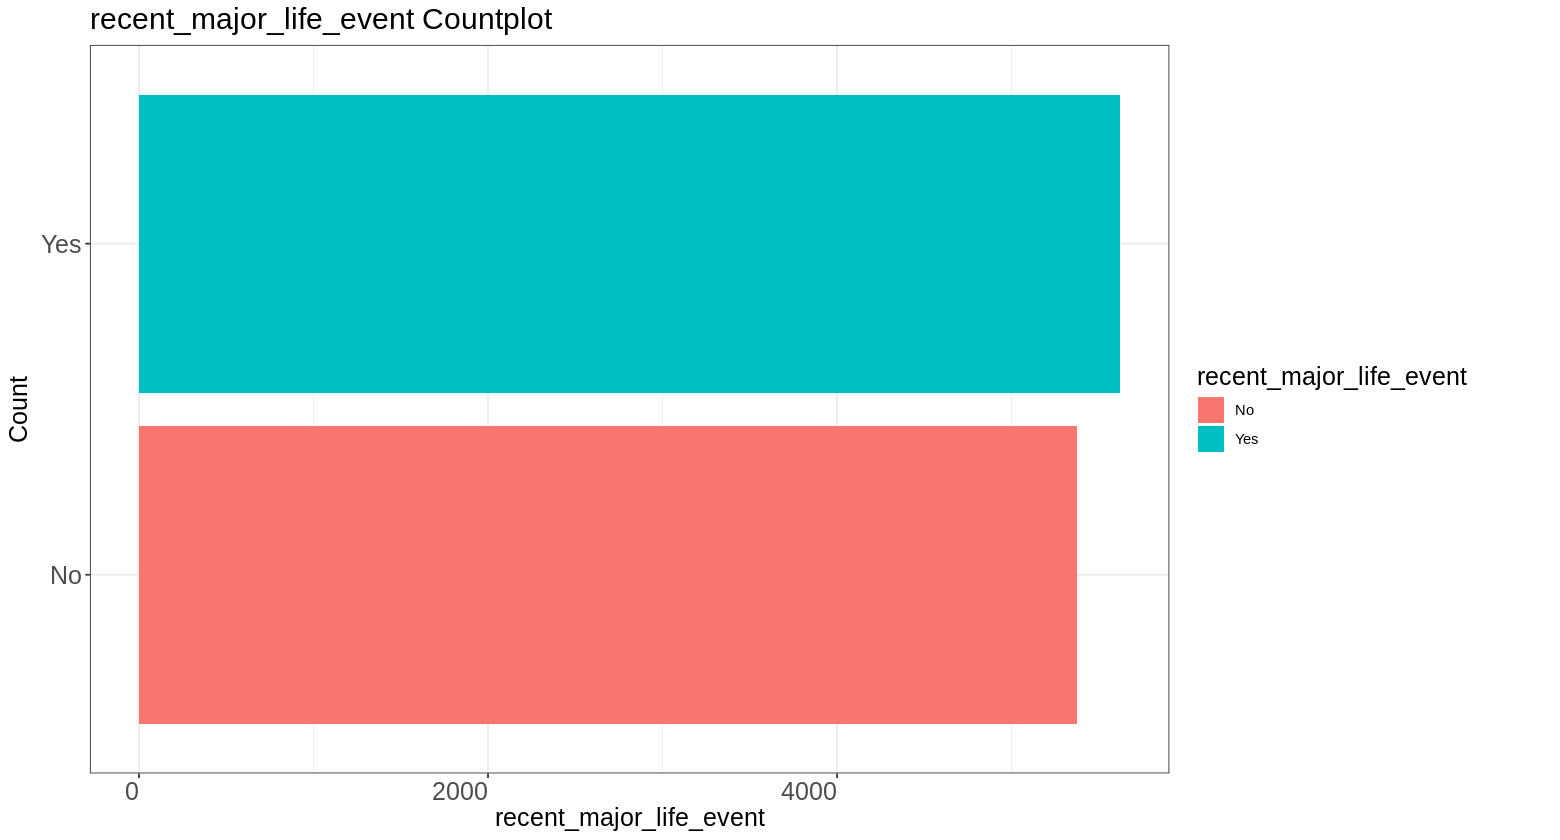

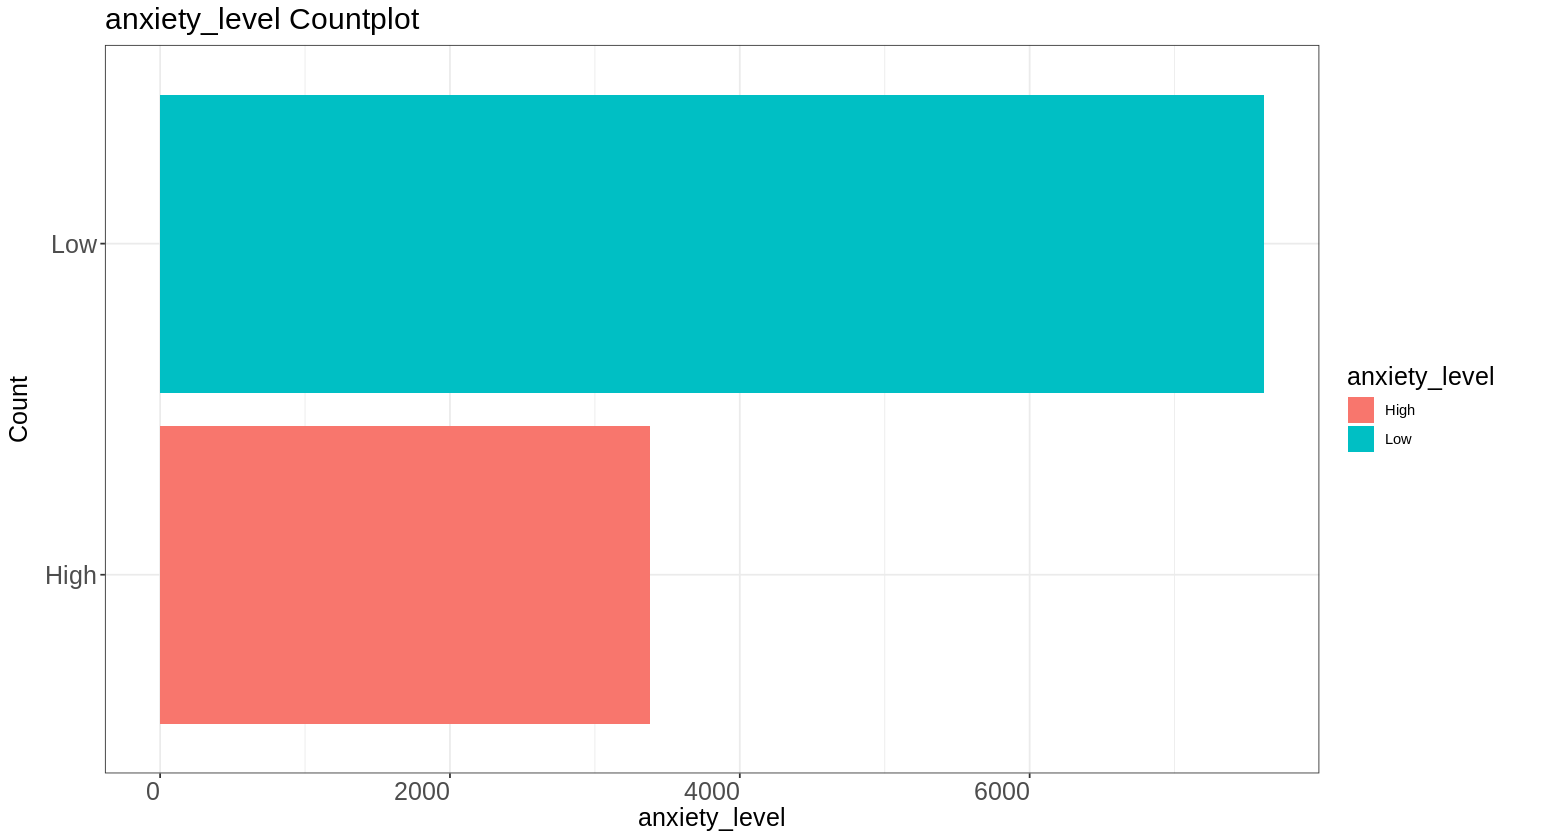

In [20]:
for(i in cat_cols){
  a <- ggplot(df) + geom_bar(aes(y=df[,i], fill = df[,i])) +
    labs(title = paste0(names(df[i]), ' Countplot'), x=names(df[i]), y = 'Count', fill = i) +
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15))

  grid.arrange(a, ncol = 1)
}

### 6.4 Correlation


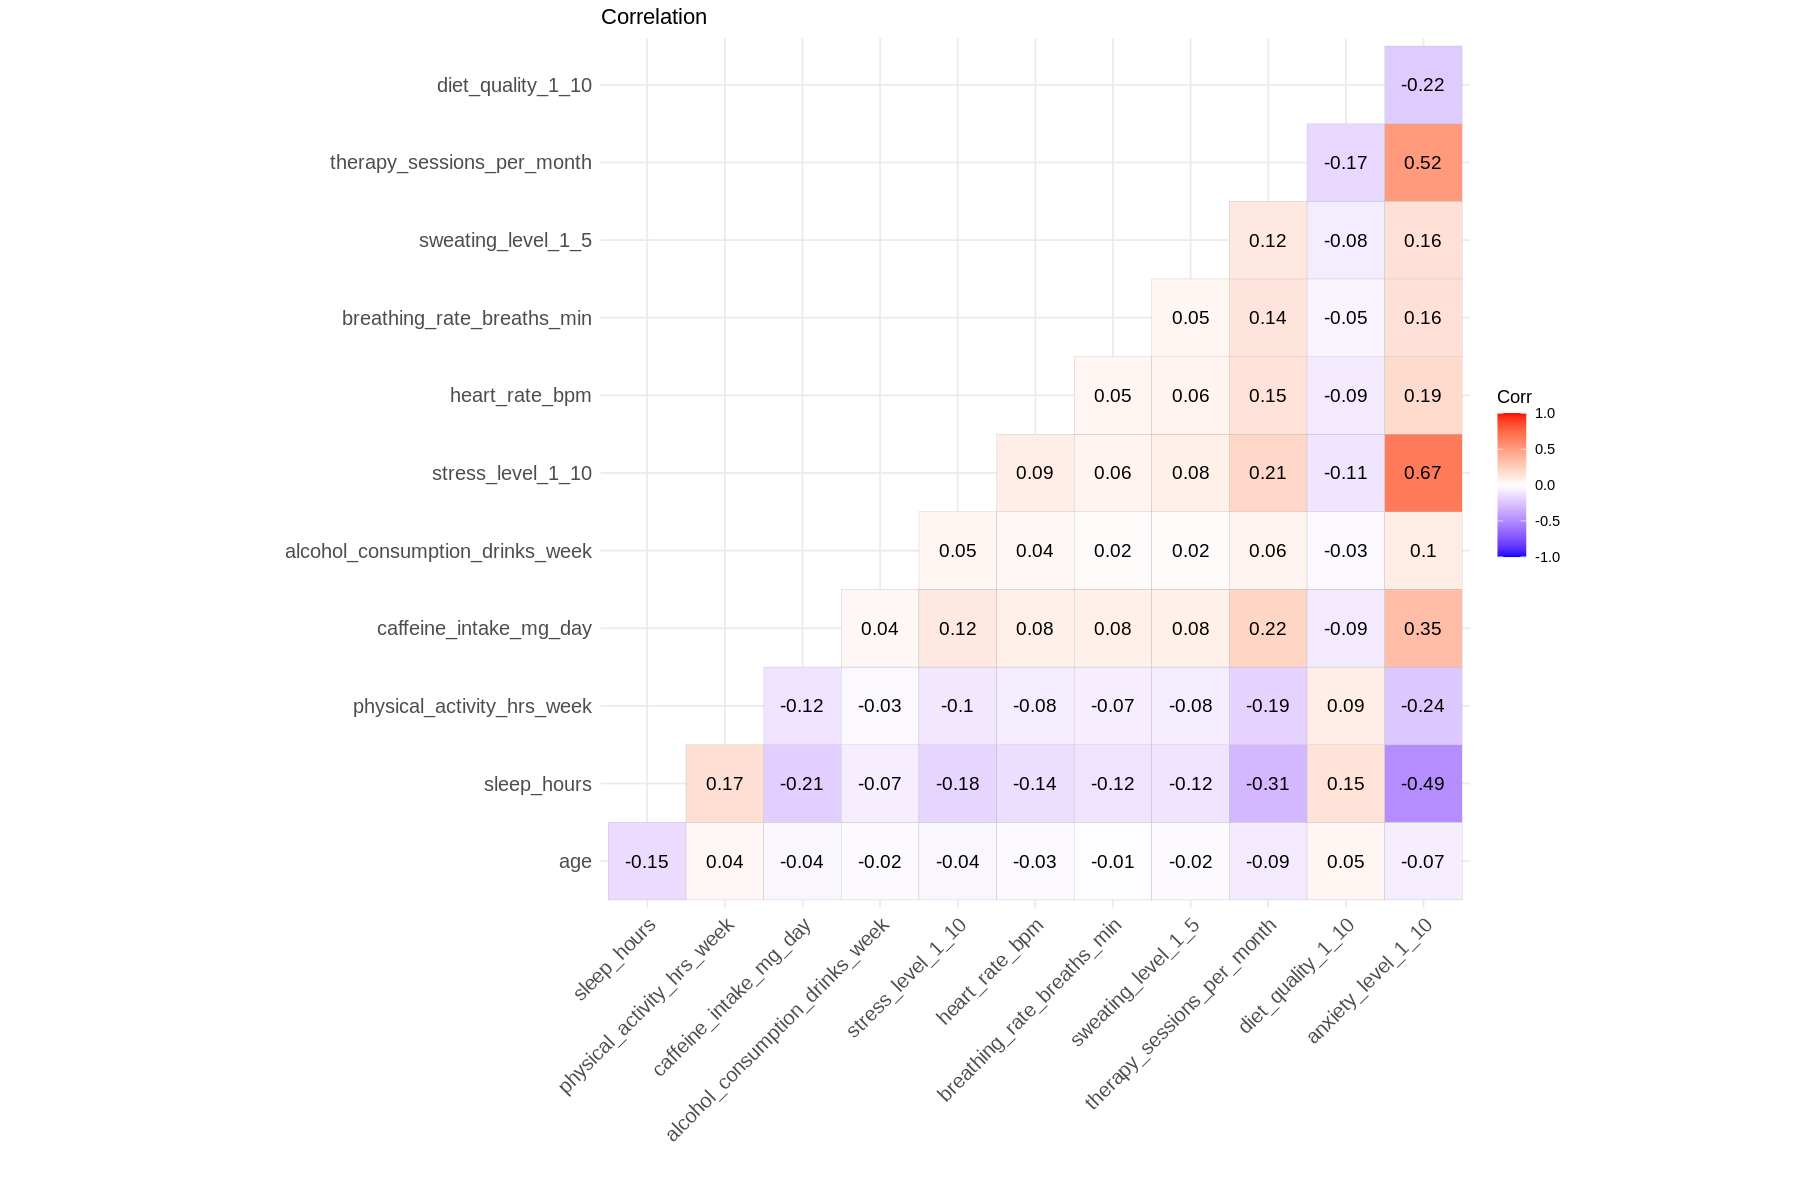

In [21]:
options(repr.plot.width = 15.0, repr.plot.height = 10.0)
ggcorrplot(cor(df[,num_cols], method= 'pearson'), type = 'lower', lab=T, title = 'Correlation')

## 7. Data processing

In [22]:
head(df)

,age,gender,occupation,sleep_hours,physical_activity_hrs_week,caffeine_intake_mg_day,alcohol_consumption_drinks_week,smoking,family_history_of_anxiety,stress_level_1_10,heart_rate_bpm,breathing_rate_breaths_min,sweating_level_1_5,dizziness,medication,therapy_sessions_per_month,recent_major_life_event,diet_quality_1_10,anxiety_level_1_10,anxiety_level
,<int>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<dbl>,<fct>
1,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5,High
2,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3,Low
3,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1,Low
4,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2,Low
5,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1,Low
6,53,Male,Other,6.4,6.5,235,2,No,No,9,84,14,3,No,Yes,2,Yes,5,4,Low


In [23]:
df <- df %>% select(-anxiety_level_1_10)

In [24]:
# Labeling
for (i in colnames(df)){
  if(is.factor(df[,i]) == TRUE)
    df[,i] <- as.numeric(df[,i])
}

In [25]:
# Target variable type conversion (Numeric -> factor)
df$anxiety_level <- as.factor(df$anxiety_level)

## 8. Data Modelling

### 8.1 Train Test Split

In [26]:
# installing r sample package for splitting the dataset
install.packages("rsample")
library("rsample")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘warp’, ‘furrr’, ‘slider’




In [27]:
# splitting using rsample
split <- rsample::initial_split(df, prop=0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

### 8.2 Recipe

In [30]:
install.packages("recipes")
library("recipes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’



Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step




In [31]:
rec <- recipes::recipe(anxiety_level ~ ., data=train) %>% # Bulds a preprocessing pipeline where the target variable is anxiety_level and all the other columns (.) are predictors
  recipes::step_dummy(all_nominal_predictors()) %>% # all categorical columns are turned to one-hot encoded columns
  recipes::step_normalize(all_numeric_predictors()) %>% # scale all numeric columns (mean=0, standartdeviation = 1)
  recipes::step_zv(all_predictors()) #Drops predictors with no variance
rec



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 18



── Operations 

• Dummy variables from: all_nominal_predictors()

• Centering and scaling for: all_numeric_predictors()

• Zero variance filter on: all_predictors()



## 8.3 Logistic Regression Model

In [36]:
install.packages("parsnip")
install.packages("workflows")

library(parsnip)
library(workflows)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘modelenv’




In [37]:
glm_model <- multinom_reg() %>%
  set_engine("nnet") %>%
  set_mode("classification")

glm_wf <- workflow() %>%
  add_recipe(rec) %>%
  add_model(glm_model)

#fitting the model
glm_fit <- glm_wf %>%
  fit(data = train)

# prediction
glm_pred <- glm_fit %>% predict(new_data = test)

In [39]:
install.packages("caret") # The package contains functions to streamline the model training process for complex regression and classification problems
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘iterators’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:rsample’:

    calibration


The following object is masked from ‘package:purrr’:

    lift




In [41]:
glm_cm <- confusionMatrix(glm_pred$.pred_class, test$anxiety_level)
glm_cm

Confusion Matrix and Statistics

          Reference
Prediction    1    2
         1  460  134
         2  225 1381
                                         
               Accuracy : 0.8368         
                 95% CI : (0.8207, 0.852)
    No Information Rate : 0.6886         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6051         
                                         
 Mcnemar's Test P-Value : 2.034e-06      
                                         
            Sensitivity : 0.6715         
            Specificity : 0.9116         
         Pos Pred Value : 0.7744         
         Neg Pred Value : 0.8599         
             Prevalence : 0.3114         
         Detection Rate : 0.2091         
   Detection Prevalence : 0.2700         
      Balanced Accuracy : 0.7915         
                                         
       'Positive' Class : 1              
                                         

### 8.4 Simple Extreme Gradient Boost (XGBoost) Model

In [46]:
install.packages("xgboost")
library(xgboost)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [47]:
xgb_spec <- boost_tree() %>%
  set_engine(engine= "xgboost", nthread = future::availableCores()) %>%
  set_mode(mode="classification")

xgb_wf <- workflow() %>%
  add_recipe(rec) %>%
  add_model(xgb_spec)

# Fitting the model
xgb_fit <- xgb_wf %>%
  fit(data = train)

# Prediction
xgb_pred <- xgb_fit %>% predict(new_data = test)


In [50]:
xgb_cm <- confusionMatrix(xgb_pred$.pred_class, test$anxiety_level)
xgb_cm

Confusion Matrix and Statistics

          Reference
Prediction    1    2
         1  438  128
         2  247 1387
                                         
               Accuracy : 0.8295         
                 95% CI : (0.8132, 0.845)
    No Information Rate : 0.6886         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5827         
                                         
 Mcnemar's Test P-Value : 1.105e-09      
                                         
            Sensitivity : 0.6394         
            Specificity : 0.9155         
         Pos Pred Value : 0.7739         
         Neg Pred Value : 0.8488         
             Prevalence : 0.3114         
         Detection Rate : 0.1991         
   Detection Prevalence : 0.2573         
      Balanced Accuracy : 0.7775         
                                         
       'Positive' Class : 1              
                                         

### 9. Model comparison

In [59]:
score <- data.frame(Model = c('Logistic','Simple XGB'),
                    Score = c(glm_cm$overall[1], glm_cm$overall[1]))
score

Model,Score
<chr>,<dbl>
Logistic,0.8368182
Simple XGB,0.8368182


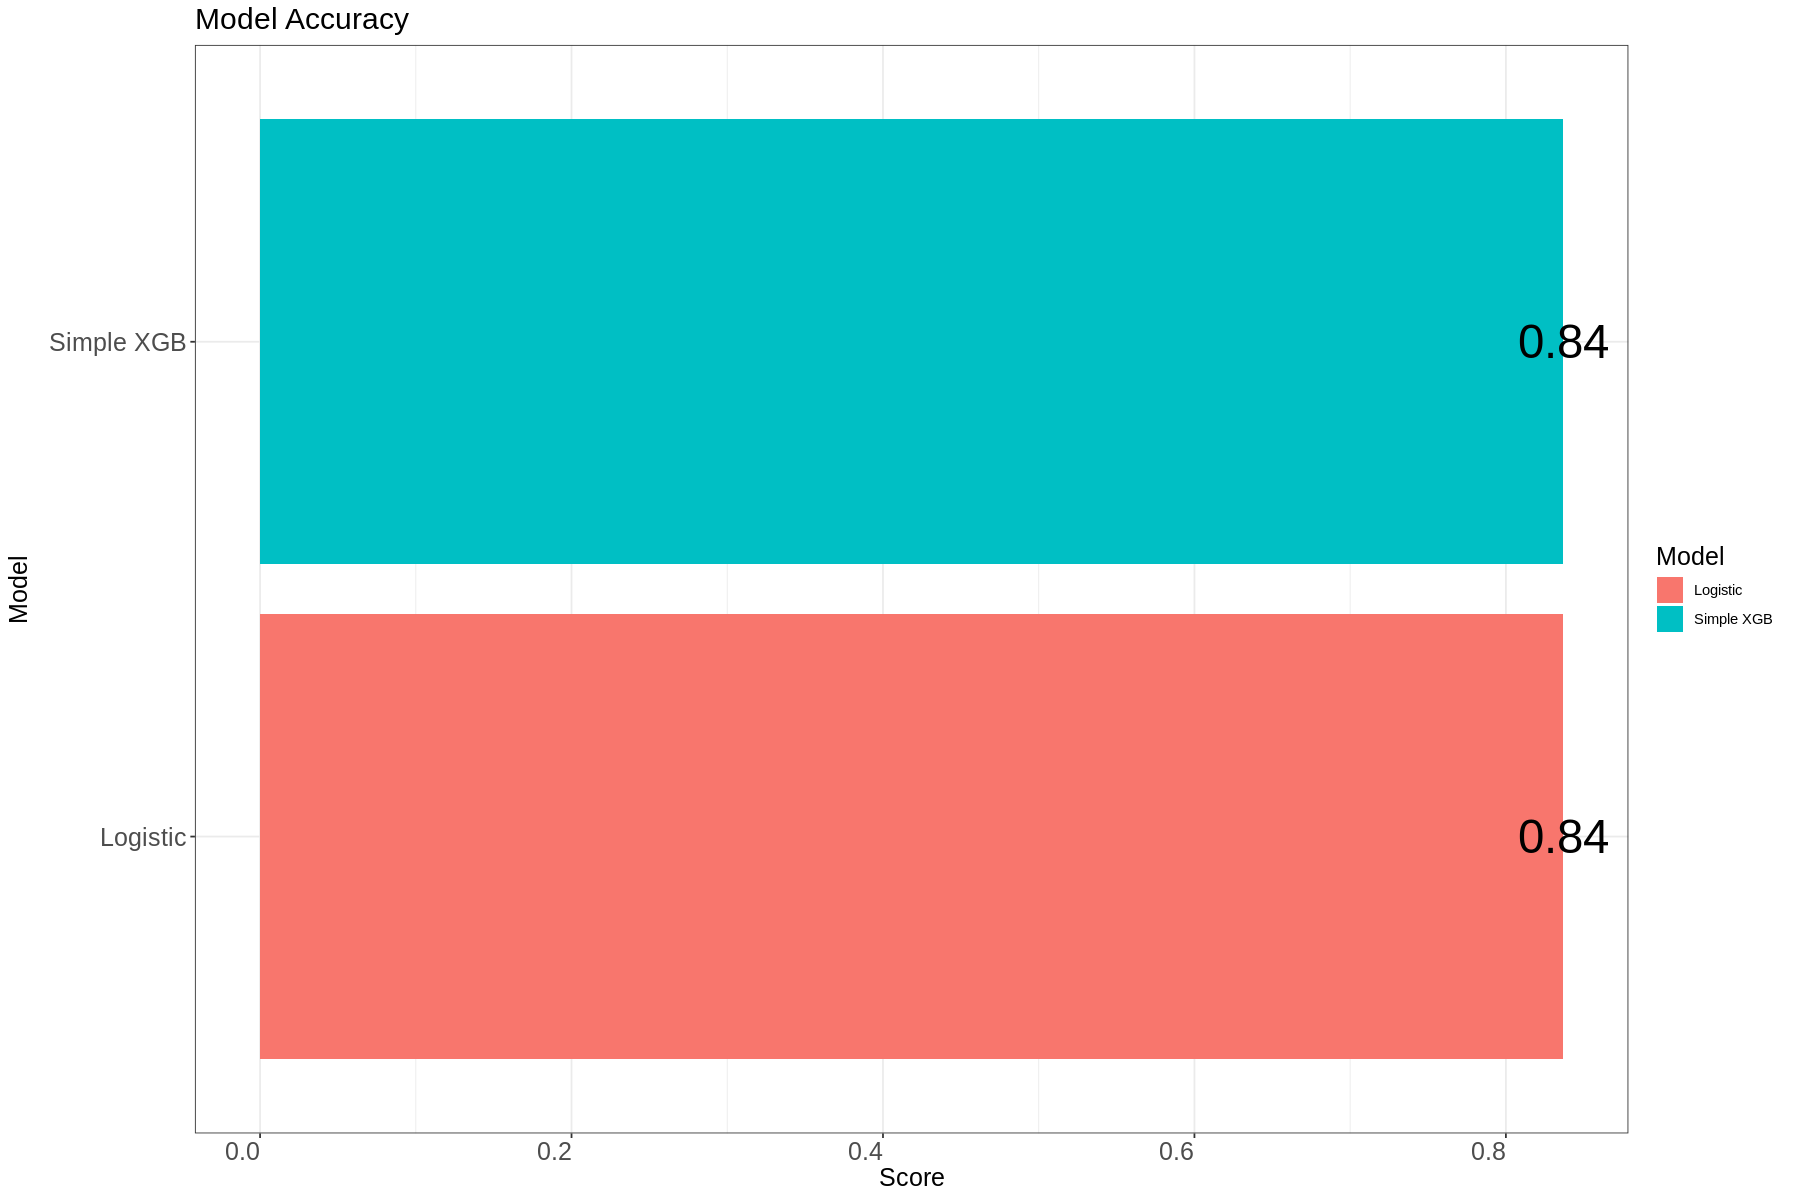

In [62]:
ggplot(score) + geom_col(aes(y=Model, x=Score, fill=Model)) +
    geom_text(aes(y=Model, x=Score, label=round(Score,2)), hjust=0.5, size=10) +
    theme_bw() +
    ggtitle("Model Accuracy") +
    theme(
    axis.title = element_text(size=15),
    axis.text.x = element_text(size=15,hjust=1),
    axis.text.y = element_text(size=15),
    title = element_text(size=15))

The accuracy of the model is similar


#### Thank you! Please leave your advice n the comments